# Air Quality Analysis

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import datetime as dt
import seaborn as sns
import numpy as np
from numpy import median

In [2]:
df = pd.read_csv('C58_Linear_reg_AirQualityUCI.csv', sep=';')
df.head()

Date      Time CO(GT)  PT08.S1(CO)  NMHC(GT) C6H6(GT)  PT08.S2(NMHC)  \
0  10/03/2004  18.00.00    2,6       1360.0     150.0     11,9         1046.0   
1  10/03/2004  19.00.00      2       1292.0     112.0      9,4          955.0   
2  10/03/2004  20.00.00    2,2       1402.0      88.0      9,0          939.0   
3  10/03/2004  21.00.00    2,2       1376.0      80.0      9,2          948.0   
4  10/03/2004  22.00.00    1,6       1272.0      51.0      6,5          836.0   

   NOx(GT)  PT08.S3(NOx)  NO2(GT)  PT08.S4(NO2)  PT08.S5(O3)     T    RH  \
0    166.0        1056.0    113.0        1692.0       1268.0  13,6  48,9   
1    103.0        1174.0     92.0        1559.0        972.0  13,3  47,7   
2    131.0        1140.0    114.0        1555.0       1074.0  11,9  54,0   
3    172.0        1092.0    122.0        1584.0       1203.0  11,0  60,0   
4    131.0        1205.0    116.0        1490.0       1110.0  11,2  59,6   

       AH  Unnamed: 15  Unnamed: 16  
0  0,7578          NaN          NaN  
1  0,7255          NaN          NaN  
2  0,7502          NaN          NaN  
3  0,7867          NaN          NaN  
4  0,7888          NaN          NaN

## Data Preprocessing

In [3]:
df.describe()

PT08.S1(CO)     NMHC(GT)  PT08.S2(NMHC)      NOx(GT)  PT08.S3(NOx)  \
count  9357.000000  9357.000000    9357.000000  9357.000000   9357.000000   
mean   1048.990061  -159.090093     894.595276   168.616971    794.990168   
std     329.832710   139.789093     342.333252   257.433866    321.993552   
min    -200.000000  -200.000000    -200.000000  -200.000000   -200.000000   
25%     921.000000  -200.000000     711.000000    50.000000    637.000000   
50%    1053.000000  -200.000000     895.000000   141.000000    794.000000   
75%    1221.000000  -200.000000    1105.000000   284.000000    960.000000   
max    2040.000000  1189.000000    2214.000000  1479.000000   2683.000000   

           NO2(GT)  PT08.S4(NO2)  PT08.S5(O3)  Unnamed: 15  Unnamed: 16  
count  9357.000000   9357.000000  9357.000000          0.0          0.0  
mean     58.148873   1391.479641   975.072032          NaN          NaN  
std     126.940455    467.210125   456.938184          NaN          NaN  
min    -200.000000   -200.000000  -200.000000          NaN          NaN  
25%      53.000000   1185.000000   700.000000          NaN          NaN  
50%      96.000000   1446.000000   942.000000          NaN          NaN  
75%     133.000000   1662.000000  1255.000000          NaN          NaN  
max     340.000000   2775.000000  2523.000000          NaN          NaN

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9471 entries, 0 to 9470
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           9357 non-null   object 
 1   Time           9357 non-null   object 
 2   CO(GT)         9357 non-null   object 
 3   PT08.S1(CO)    9357 non-null   float64
 4   NMHC(GT)       9357 non-null   float64
 5   C6H6(GT)       9357 non-null   object 
 6   PT08.S2(NMHC)  9357 non-null   float64
 7   NOx(GT)        9357 non-null   float64
 8   PT08.S3(NOx)   9357 non-null   float64
 9   NO2(GT)        9357 non-null   float64
 10  PT08.S4(NO2)   9357 non-null   float64
 11  PT08.S5(O3)    9357 non-null   float64
 12  T              9357 non-null   object 
 13  RH             9357 non-null   object 
 14  AH             9357 non-null   object 
 15  Unnamed: 15    0 non-null      float64
 16  Unnamed: 16    0 non-null      float64
dtypes: float64(10), object(7)
memory usage: 1.2+ MB


#### 1) Drop Null columns

In [5]:
df = df.drop(columns=['Unnamed: 15', 'Unnamed: 16'], axis = 1)

#### 2) Removing Missing Values

In [6]:
df.isnull().sum()

Date             114
Time             114
CO(GT)           114
PT08.S1(CO)      114
NMHC(GT)         114
C6H6(GT)         114
PT08.S2(NMHC)    114
NOx(GT)          114
PT08.S3(NOx)     114
NO2(GT)          114
PT08.S4(NO2)     114
PT08.S5(O3)      114
T                114
RH               114
AH               114
dtype: int64

In [7]:
df.head()

Date      Time CO(GT)  PT08.S1(CO)  NMHC(GT) C6H6(GT)  PT08.S2(NMHC)  \
0  10/03/2004  18.00.00    2,6       1360.0     150.0     11,9         1046.0   
1  10/03/2004  19.00.00      2       1292.0     112.0      9,4          955.0   
2  10/03/2004  20.00.00    2,2       1402.0      88.0      9,0          939.0   
3  10/03/2004  21.00.00    2,2       1376.0      80.0      9,2          948.0   
4  10/03/2004  22.00.00    1,6       1272.0      51.0      6,5          836.0   

   NOx(GT)  PT08.S3(NOx)  NO2(GT)  PT08.S4(NO2)  PT08.S5(O3)     T    RH  \
0    166.0        1056.0    113.0        1692.0       1268.0  13,6  48,9   
1    103.0        1174.0     92.0        1559.0        972.0  13,3  47,7   
2    131.0        1140.0    114.0        1555.0       1074.0  11,9  54,0   
3    172.0        1092.0    122.0        1584.0       1203.0  11,0  60,0   
4    131.0        1205.0    116.0        1490.0       1110.0  11,2  59,6   

       AH  
0  0,7578  
1  0,7255  
2  0,7502  
3  0,7867  
4  0,7888

In [8]:
df[df['Date'].isnull() == True]

Date Time CO(GT)  PT08.S1(CO)  NMHC(GT) C6H6(GT)  PT08.S2(NMHC)  NOx(GT)  \
9357  NaN  NaN    NaN          NaN       NaN      NaN            NaN      NaN   
9358  NaN  NaN    NaN          NaN       NaN      NaN            NaN      NaN   
9359  NaN  NaN    NaN          NaN       NaN      NaN            NaN      NaN   
9360  NaN  NaN    NaN          NaN       NaN      NaN            NaN      NaN   
9361  NaN  NaN    NaN          NaN       NaN      NaN            NaN      NaN   
...   ...  ...    ...          ...       ...      ...            ...      ...   
9466  NaN  NaN    NaN          NaN       NaN      NaN            NaN      NaN   
9467  NaN  NaN    NaN          NaN       NaN      NaN            NaN      NaN   
9468  NaN  NaN    NaN          NaN       NaN      NaN            NaN      NaN   
9469  NaN  NaN    NaN          NaN       NaN      NaN            NaN      NaN   
9470  NaN  NaN    NaN          NaN       NaN      NaN            NaN      NaN   

      PT08.S3(NOx)  NO2(GT)  PT08.S4(NO2)  PT08.S5(O3)    T   RH   AH  
9357           NaN      NaN           NaN          NaN  NaN  NaN  NaN  
9358           NaN      NaN           NaN          NaN  NaN  NaN  NaN  
9359           NaN      NaN           NaN          NaN  NaN  NaN  NaN  
9360           NaN      NaN           NaN          NaN  NaN  NaN  NaN  
9361           NaN      NaN           NaN          NaN  NaN  NaN  NaN  
...            ...      ...           ...          ...  ...  ...  ...  
9466           NaN      NaN           NaN          NaN  NaN  NaN  NaN  
9467           NaN      NaN           NaN          NaN  NaN  NaN  NaN  
9468           NaN      NaN           NaN          NaN  NaN  NaN  NaN  
9469           NaN      NaN           NaN          NaN  NaN  NaN  NaN  
9470           NaN      NaN           NaN          NaN  NaN  NaN  NaN  

[114 rows x 15 columns]

### 3) Drop all null values

In [9]:
df = df.dropna()

In [10]:
df.isnull().sum()

Date             0
Time             0
CO(GT)           0
PT08.S1(CO)      0
NMHC(GT)         0
C6H6(GT)         0
PT08.S2(NMHC)    0
NOx(GT)          0
PT08.S3(NOx)     0
NO2(GT)          0
PT08.S4(NO2)     0
PT08.S5(O3)      0
T                0
RH               0
AH               0
dtype: int64

In [11]:
df.shape

(9357, 15)

### 4) Parsing datetime Values

In [12]:
dt_series = pd.Series(data = [item.split('/')[2] + '-' + item.split('/')[1] + '-' + item.split('/')[0] for item in df['Date']], index = df.index) + ' ' + pd.Series(data = [str(item).replace('.', ':') for item in df['Time']], index = df.index)
dt_series = pd.to_datetime(dt_series)
dt_series

0      2004-03-10 18:00:00
1      2004-03-10 19:00:00
2      2004-03-10 20:00:00
3      2004-03-10 21:00:00
4      2004-03-10 22:00:00
               ...        
9352   2005-04-04 10:00:00
9353   2005-04-04 11:00:00
9354   2005-04-04 12:00:00
9355   2005-04-04 13:00:00
9356   2005-04-04 14:00:00
Length: 9357, dtype: datetime64[ns]

### Adding columns

In [13]:
df = df.drop(columns = ['Date', 'Time'], axis = 1)
df.insert(loc = 0, column = 'DateTime', value = dt_series)

In [14]:
year_series = dt_series.dt.year
month_series = dt_series.dt.month
day_series = dt_series.dt.day
day_name_series = dt_series.dt.day_name()

df['Day'] = day_series
df['Month'] = month_series
df['Year'] = year_series
df['Day Name'] = day_name_series

df = df.sort_values(by = 'DateTime')

In [15]:
df.head()

DateTime CO(GT)  PT08.S1(CO)  NMHC(GT) C6H6(GT)  PT08.S2(NMHC)  \
0 2004-03-10 18:00:00    2,6       1360.0     150.0     11,9         1046.0   
1 2004-03-10 19:00:00      2       1292.0     112.0      9,4          955.0   
2 2004-03-10 20:00:00    2,2       1402.0      88.0      9,0          939.0   
3 2004-03-10 21:00:00    2,2       1376.0      80.0      9,2          948.0   
4 2004-03-10 22:00:00    1,6       1272.0      51.0      6,5          836.0   

   NOx(GT)  PT08.S3(NOx)  NO2(GT)  PT08.S4(NO2)  PT08.S5(O3)     T    RH  \
0    166.0        1056.0    113.0        1692.0       1268.0  13,6  48,9   
1    103.0        1174.0     92.0        1559.0        972.0  13,3  47,7   
2    131.0        1140.0    114.0        1555.0       1074.0  11,9  54,0   
3    172.0        1092.0    122.0        1584.0       1203.0  11,0  60,0   
4    131.0        1205.0    116.0        1490.0       1110.0  11,2  59,6   

       AH  Day  Month  Year   Day Name  
0  0,7578   10      3  2004  Wednesday  
1  0,7255   10      3  2004  Wednesday  
2  0,7502   10      3  2004  Wednesday  
3  0,7867   10      3  2004  Wednesday  
4  0,7888   10      3  2004  Wednesday

### 5) Comma to Period i.e. ( ',' to '.')

In [16]:
def comma_to_period(series):
    new_series = pd.Series(data=[float(str(item).replace(',', '.')) for item in series], index = df.index)
    return new_series

In [17]:
cols_to_correct = ['CO(GT)', 'C6H6(GT)', 'T', 'RH', 'AH']
for col in cols_to_correct:
    df[col] = comma_to_period(df[col])

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9357 entries, 0 to 9356
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   DateTime       9357 non-null   datetime64[ns]
 1   CO(GT)         9357 non-null   float64       
 2   PT08.S1(CO)    9357 non-null   float64       
 3   NMHC(GT)       9357 non-null   float64       
 4   C6H6(GT)       9357 non-null   float64       
 5   PT08.S2(NMHC)  9357 non-null   float64       
 6   NOx(GT)        9357 non-null   float64       
 7   PT08.S3(NOx)   9357 non-null   float64       
 8   NO2(GT)        9357 non-null   float64       
 9   PT08.S4(NO2)   9357 non-null   float64       
 10  PT08.S5(O3)    9357 non-null   float64       
 11  T              9357 non-null   float64       
 12  RH             9357 non-null   float64       
 13  AH             9357 non-null   float64       
 14  Day            9357 non-null   int64         
 15  Month          9357 n

### 6) Garbage data Inspection

Replacing garbage values (-ve) by median or mean

In [19]:
df.describe()

CO(GT)  PT08.S1(CO)     NMHC(GT)     C6H6(GT)  PT08.S2(NMHC)  \
count  9357.000000  9357.000000  9357.000000  9357.000000    9357.000000   
mean    -34.207524  1048.990061  -159.090093     1.865683     894.595276   
std      77.657170   329.832710   139.789093    41.380206     342.333252   
min    -200.000000  -200.000000  -200.000000  -200.000000    -200.000000   
25%       0.600000   921.000000  -200.000000     4.000000     711.000000   
50%       1.500000  1053.000000  -200.000000     7.900000     895.000000   
75%       2.600000  1221.000000  -200.000000    13.600000    1105.000000   
max      11.900000  2040.000000  1189.000000    63.700000    2214.000000   

           NOx(GT)  PT08.S3(NOx)      NO2(GT)  PT08.S4(NO2)  PT08.S5(O3)  \
count  9357.000000   9357.000000  9357.000000   9357.000000  9357.000000   
mean    168.616971    794.990168    58.148873   1391.479641   975.072032   
std     257.433866    321.993552   126.940455    467.210125   456.938184   
min    -200.000000   -200.000000  -200.000000   -200.000000  -200.000000   
25%      50.000000    637.000000    53.000000   1185.000000   700.000000   
50%     141.000000    794.000000    96.000000   1446.000000   942.000000   
75%     284.000000    960.000000   133.000000   1662.000000  1255.000000   
max    1479.000000   2683.000000   340.000000   2775.000000  2523.000000   

                 T           RH           AH          Day        Month  \
count  9357.000000  9357.000000  9357.000000  9357.000000  9357.000000   
mean      9.778305    39.485380    -6.837604    15.876884     6.310356   
std      43.203623    51.216145    38.976670     8.808653     3.438160   
min    -200.000000  -200.000000  -200.000000     1.000000     1.000000   
25%      10.900000    34.100000     0.692300     8.000000     3.000000   
50%      17.200000    48.600000     0.976800    16.000000     6.000000   
75%      24.100000    61.900000     1.296200    23.000000     9.000000   
max      44.600000    88.700000     2.231000    31.000000    12.000000   

              Year  
count  9357.000000  
mean   2004.240141  
std       0.427192  
min    2004.000000  
25%    2004.000000  
50%    2004.000000  
75%    2004.000000  
max    2005.000000

We observe there are negative values in most of the places in dataset

We will replace the negative values by the mean of the rest of the positive values to not "lessen" the dataset

In [20]:
neg_counts = [(col, df[df[col] == -200].shape[0]) for col in df.columns[1:-4]]
neg_counts

[('CO(GT)', 1683),
 ('PT08.S1(CO)', 366),
 ('NMHC(GT)', 8443),
 ('C6H6(GT)', 366),
 ('PT08.S2(NMHC)', 366),
 ('NOx(GT)', 1639),
 ('PT08.S3(NOx)', 366),
 ('NO2(GT)', 1642),
 ('PT08.S4(NO2)', 366),
 ('PT08.S5(O3)', 366),
 ('T', 366),
 ('RH', 366),
 ('AH', 366)]

In [21]:
neg_percent = [(col, round(df[df[col] == -200].shape[0] * 100/ df.shape[0], 2)) for col in df.columns[1:-4]]
neg_percent

[('CO(GT)', 17.99),
 ('PT08.S1(CO)', 3.91),
 ('NMHC(GT)', 90.23),
 ('C6H6(GT)', 3.91),
 ('PT08.S2(NMHC)', 3.91),
 ('NOx(GT)', 17.52),
 ('PT08.S3(NOx)', 3.91),
 ('NO2(GT)', 17.55),
 ('PT08.S4(NO2)', 3.91),
 ('PT08.S5(O3)', 3.91),
 ('T', 3.91),
 ('RH', 3.91),
 ('AH', 3.91)]

### Garbage value Removal

We remove the columns that have >10% negative values

In [22]:
df = df.drop(columns=['CO(GT)', 'NMHC(GT)', 'NOx(GT)', 'NO2(GT)'], axis = 1)
df.columns

Index(['DateTime', 'PT08.S1(CO)', 'C6H6(GT)', 'PT08.S2(NMHC)', 'PT08.S3(NOx)',
       'PT08.S4(NO2)', 'PT08.S5(O3)', 'T', 'RH', 'AH', 'Day', 'Month', 'Year',
       'Day Name'],
      dtype='object')

In [23]:
neg_percent = [(col, round(df[df[col] == -200].shape[0] * 100/ df.shape[0], 2)) for col in df.columns[1:-4]]
neg_percent

[('PT08.S1(CO)', 3.91),
 ('C6H6(GT)', 3.91),
 ('PT08.S2(NMHC)', 3.91),
 ('PT08.S3(NOx)', 3.91),
 ('PT08.S4(NO2)', 3.91),
 ('PT08.S5(O3)', 3.91),
 ('T', 3.91),
 ('RH', 3.91),
 ('AH', 3.91)]

### Garbage value Replacement

Before we separate the Dataframe, let's calculate the yearwise data points

In [24]:
df['Year'].value_counts()

2004    7110
2005    2247
Name: Year, dtype: int64

In [25]:
aq_2004_df =df[df['Year']== 2004]
aq_2004_df.head()

DateTime  PT08.S1(CO)  C6H6(GT)  PT08.S2(NMHC)  PT08.S3(NOx)  \
0 2004-03-10 18:00:00       1360.0      11.9         1046.0        1056.0   
1 2004-03-10 19:00:00       1292.0       9.4          955.0        1174.0   
2 2004-03-10 20:00:00       1402.0       9.0          939.0        1140.0   
3 2004-03-10 21:00:00       1376.0       9.2          948.0        1092.0   
4 2004-03-10 22:00:00       1272.0       6.5          836.0        1205.0   

   PT08.S4(NO2)  PT08.S5(O3)     T    RH      AH  Day  Month  Year   Day Name  
0        1692.0       1268.0  13.6  48.9  0.7578   10      3  2004  Wednesday  
1        1559.0        972.0  13.3  47.7  0.7255   10      3  2004  Wednesday  
2        1555.0       1074.0  11.9  54.0  0.7502   10      3  2004  Wednesday  
3        1584.0       1203.0  11.0  60.0  0.7867   10      3  2004  Wednesday  
4        1490.0       1110.0  11.2  59.6  0.7888   10      3  2004  Wednesday

In [26]:
aq_2004_df.shape

(7110, 14)

In [27]:
[(aq_2004_df[aq_2004_df[col] == -200].shape[0]) for col in aq_2004_df.columns[1:-4]]

[228, 228, 228, 228, 228, 228, 228, 228, 228]

In [28]:
aq_2005_df =df[df['Year']== 2005]
aq_2005_df.head()

DateTime  PT08.S1(CO)  C6H6(GT)  PT08.S2(NMHC)  PT08.S3(NOx)  \
7110 2005-01-01 00:00:00       1046.0       4.2          724.0         848.0   
7111 2005-01-01 01:00:00       1275.0       8.8          930.0         649.0   
7112 2005-01-01 02:00:00       1173.0       7.5          878.0         738.0   
7113 2005-01-01 03:00:00       1163.0       7.6          881.0         748.0   
7114 2005-01-01 04:00:00       1054.0       5.6          791.0         830.0   

      PT08.S4(NO2)  PT08.S5(O3)    T    RH      AH  Day  Month  Year  Day Name  
7110         898.0       1201.0  8.2  40.1  0.4375    1      1  2005  Saturday  
7111        1024.0       1617.0  5.3  50.7  0.4564    1      1  2005  Saturday  
7112        1002.0       1355.0  5.9  50.0  0.4689    1      1  2005  Saturday  
7113        1001.0       1296.0  4.9  53.9  0.4693    1      1  2005  Saturday  
7114         967.0       1131.0  4.3  55.3  0.4650    1      1  2005  Saturday

In [29]:
aq_2005_df.shape

(2247, 14)

In [30]:
[(aq_2005_df[aq_2005_df[col] == -200].shape[0]) for col in aq_2005_df.columns[1:-4]]

[138, 138, 138, 138, 138, 138, 138, 138, 138]

In [31]:
import warnings
warnings.filterwarnings('ignore')

for col in aq_2004_df.columns[1:-4]:
    median = aq_2004_df.loc[df[col] != -200, col].median()
    aq_2004_df[col] = aq_2004_df[col].replace(to_replace = -200, value = median)

In [32]:
aq_2004_df.tail()

DateTime  PT08.S1(CO)  C6H6(GT)  PT08.S2(NMHC)  PT08.S3(NOx)  \
7105 2004-12-31 19:00:00        930.0       5.3          781.0         933.0   
7106 2004-12-31 20:00:00        962.0       5.3          780.0         919.0   
7107 2004-12-31 21:00:00        974.0       5.5          790.0         915.0   
7108 2004-12-31 22:00:00       1055.0       5.6          791.0         845.0   
7109 2004-12-31 23:00:00       1003.0       4.6          744.0         882.0   

      PT08.S4(NO2)  PT08.S5(O3)    T    RH      AH  Day  Month  Year Day Name  
7105         906.0        866.0  9.3  33.6  0.3958   31     12  2004   Friday  
7106         909.0        884.0  9.6  32.3  0.3871   31     12  2004   Friday  
7107         895.0        951.0  9.1  32.5  0.3766   31     12  2004   Friday  
7108         936.0       1195.0  9.1  37.2  0.4310   31     12  2004   Friday  
7109         899.0       1138.0  7.8  38.4  0.4085   31     12  2004   Friday

In [33]:
neg_val_2004 = [(col, aq_2004_df[aq_2004_df[col] == -200].shape[0]) for col in aq_2004_df.columns[1:-4]]
neg_val_2004

[('PT08.S1(CO)', 0),
 ('C6H6(GT)', 0),
 ('PT08.S2(NMHC)', 0),
 ('PT08.S3(NOx)', 0),
 ('PT08.S4(NO2)', 0),
 ('PT08.S5(O3)', 0),
 ('T', 0),
 ('RH', 0),
 ('AH', 0)]

In [34]:
import warnings
warnings.filterwarnings('ignore')

for col in aq_2005_df.columns[1:-4]:
    median = aq_2005_df.loc[df[col] != -200, col].median()
    aq_2005_df[col] = aq_2005_df[col].replace(to_replace = -200, value = median)

In [35]:
aq_2005_df.tail()

DateTime  PT08.S1(CO)  C6H6(GT)  PT08.S2(NMHC)  PT08.S3(NOx)  \
9352 2005-04-04 10:00:00       1314.0      13.5         1101.0         539.0   
9353 2005-04-04 11:00:00       1163.0      11.4         1027.0         604.0   
9354 2005-04-04 12:00:00       1142.0      12.4         1063.0         603.0   
9355 2005-04-04 13:00:00       1003.0       9.5          961.0         702.0   
9356 2005-04-04 14:00:00       1071.0      11.9         1047.0         654.0   

      PT08.S4(NO2)  PT08.S5(O3)     T    RH      AH  Day  Month  Year Day Name  
9352        1374.0       1729.0  21.9  29.3  0.7568    4      4  2005   Monday  
9353        1264.0       1269.0  24.3  23.7  0.7119    4      4  2005   Monday  
9354        1241.0       1092.0  26.9  18.3  0.6406    4      4  2005   Monday  
9355        1041.0        770.0  28.3  13.5  0.5139    4      4  2005   Monday  
9356        1129.0        816.0  28.5  13.1  0.5028    4      4  2005   Monday

In [36]:
neg_val_2005 = [(col, aq_2005_df[aq_2005_df[col] == -200].shape[0]) for col in aq_2005_df.columns[1:-4]]
neg_val_2005

[('PT08.S1(CO)', 0),
 ('C6H6(GT)', 0),
 ('PT08.S2(NMHC)', 0),
 ('PT08.S3(NOx)', 0),
 ('PT08.S4(NO2)', 0),
 ('PT08.S5(O3)', 0),
 ('T', 0),
 ('RH', 0),
 ('AH', 0)]

## Data Grouping & Aggregation

In [37]:
group_2004_month = aq_2004_df.groupby(by='Month')
group_2004_month

#### Group by March

In [38]:
group_2004_month.get_group(3)

DateTime  PT08.S1(CO)  C6H6(GT)  PT08.S2(NMHC)  PT08.S3(NOx)  \
0   2004-03-10 18:00:00       1360.0      11.9         1046.0        1056.0   
1   2004-03-10 19:00:00       1292.0       9.4          955.0        1174.0   
2   2004-03-10 20:00:00       1402.0       9.0          939.0        1140.0   
3   2004-03-10 21:00:00       1376.0       9.2          948.0        1092.0   
4   2004-03-10 22:00:00       1272.0       6.5          836.0        1205.0   
..                  ...          ...       ...            ...           ...   
505 2004-03-31 19:00:00       1254.0      11.5         1033.0         819.0   
506 2004-03-31 20:00:00       1198.0       9.3          953.0         882.0   
507 2004-03-31 21:00:00       1060.0       5.5          787.0        1044.0   
508 2004-03-31 22:00:00       1050.0       5.1          769.0        1078.0   
509 2004-03-31 23:00:00       1029.0       4.8          754.0        1098.0   

     PT08.S4(NO2)  PT08.S5(O3)     T    RH      AH  Day  Month  Year  \
0          1692.0       1268.0  13.6  48.9  0.7578   10      3  2004   
1          1559.0        972.0  13.3  47.7  0.7255   10      3  2004   
2          1555.0       1074.0  11.9  54.0  0.7502   10      3  2004   
3          1584.0       1203.0  11.0  60.0  0.7867   10      3  2004   
4          1490.0       1110.0  11.2  59.6  0.7888   10      3  2004   
..            ...          ...   ...   ...     ...  ...    ...   ...   
505        1669.0       1068.0  14.3  52.9  0.8581   31      3  2004   
506        1588.0       1019.0  13.2  56.0  0.8446   31      3  2004   
507        1418.0        833.0  12.6  57.0  0.8315   31      3  2004   
508        1409.0        759.0  12.3  57.8  0.8224   31      3  2004   
509        1395.0        749.0  12.0  58.4  0.8164   31      3  2004   

      Day Name  
0    Wednesday  
1    Wednesday  
2    Wednesday  
3    Wednesday  
4    Wednesday  
..         ...  
505  Wednesday  
506  Wednesday  
507  Wednesday  
508  Wednesday  
509  Wednesday  

[510 rows x 14 columns]

#### Group by April

In [39]:
group_2004_month.get_group(4)

DateTime  PT08.S1(CO)  C6H6(GT)  PT08.S2(NMHC)  PT08.S3(NOx)  \
510  2004-04-01 00:00:00       1143.0       6.3          825.0         986.0   
511  2004-04-01 01:00:00       1044.0       5.1          770.0        1031.0   
512  2004-04-01 02:00:00       1034.0       4.1          716.0        1085.0   
513  2004-04-01 03:00:00        956.0       4.0          713.0        1099.0   
514  2004-04-01 04:00:00        909.0       2.4          615.0        1237.0   
...                  ...          ...       ...            ...           ...   
1225 2004-04-30 19:00:00       1626.0      26.9         1476.0         555.0   
1226 2004-04-30 20:00:00       1449.0      19.5         1282.0         625.0   
1227 2004-04-30 21:00:00       1363.0      15.1         1152.0         684.0   
1228 2004-04-30 22:00:00       1371.0      14.6         1136.0         689.0   
1229 2004-04-30 23:00:00       1406.0      13.7         1107.0         718.0   

      PT08.S4(NO2)  PT08.S5(O3)     T    RH      AH  Day  Month  Year  \
510         1477.0        978.0  12.0  61.6  0.8593    1      4  2004   
511         1425.0        944.0  11.5  63.9  0.8652    1      4  2004   
512         1405.0        891.0  10.7  67.2  0.8630    1      4  2004   
513         1422.0        849.0   9.0  73.1  0.8394    1      4  2004   
514         1322.0        790.0  10.2  66.6  0.8299    1      4  2004   
...            ...          ...   ...   ...     ...  ...    ...   ...   
1225        2356.0       1786.0  19.8  58.6  1.3392   30      4  2004   
1226        2100.0       1569.0  19.1  61.1  1.3345   30      4  2004   
1227        1951.0       1495.0  18.2  65.4  1.3529   30      4  2004   
1228        1927.0       1471.0  18.1  66.1  1.3579   30      4  2004   
1229        1872.0       1384.0  17.7  66.9  1.3422   30      4  2004   

      Day Name  
510   Thursday  
511   Thursday  
512   Thursday  
513   Thursday  
514   Thursday  
...        ...  
1225    Friday  
1226    Friday  
1227    Friday  
1228    Friday  
1229    Friday  

[720 rows x 14 columns]

In [40]:
group_2005_month = aq_2005_df.groupby(by='Month')
group_2005_month

In [41]:
group_2005_month.get_group(3)

DateTime  PT08.S1(CO)  C6H6(GT)  PT08.S2(NMHC)  PT08.S3(NOx)  \
8526 2005-03-01 00:00:00        766.0       1.2          515.0        1327.0   
8527 2005-03-01 01:00:00        762.0       0.9          487.0        1364.0   
8528 2005-03-01 02:00:00        736.0       0.6          453.0        1498.0   
8529 2005-03-01 03:00:00        715.0       0.2          387.0        1791.0   
8530 2005-03-01 04:00:00        716.0       0.2          390.0        1804.0   
...                  ...          ...       ...            ...           ...   
9265 2005-03-31 19:00:00       1102.0       8.3          912.0         647.0   
9266 2005-03-31 20:00:00        976.0       4.4          731.0         787.0   
9267 2005-03-31 21:00:00        895.0       2.3          607.0         944.0   
9268 2005-03-31 22:00:00        886.0       1.8          568.0        1015.0   
9269 2005-03-31 23:00:00        886.0       2.1          589.0         975.0   

      PT08.S4(NO2)  PT08.S5(O3)     T    RH      AH  Day  Month  Year  \
8526         642.0        322.0   1.0  37.4  0.2487    1      3  2005   
8527         640.0        307.0   0.7  41.2  0.2693    1      3  2005   
8528         602.0        268.0   0.2  40.6  0.2566    1      3  2005   
8529         559.0        227.0   0.1  40.0  0.2499    1      3  2005   
8530         551.0        221.0  -0.1  37.5  0.2326    1      3  2005   
...            ...          ...   ...   ...     ...  ...    ...   ...   
9265        1287.0        872.0  17.8  45.2  0.9123   31      3  2005   
9266        1095.0        622.0  16.3  47.3  0.8686   31      3  2005   
9267        1012.0        512.0  16.3  44.8  0.8244   31      3  2005   
9268         992.0        438.0  15.6  47.1  0.8273   31      3  2005   
9269        1001.0        443.0  15.1  47.6  0.8139   31      3  2005   

      Day Name  
8526   Tuesday  
8527   Tuesday  
8528   Tuesday  
8529   Tuesday  
8530   Tuesday  
...        ...  
9265  Thursday  
9266  Thursday  
9267  Thursday  
9268  Thursday  
9269  Thursday  

[744 rows x 14 columns]

### Comparing descriptive statistics of March 2004 &  March 2005

In [42]:
group_2004_month.get_group(3).describe()

PT08.S1(CO)    C6H6(GT)  PT08.S2(NMHC)  PT08.S3(NOx)  PT08.S4(NO2)  \
count   510.000000  510.000000     510.000000    510.000000    510.000000   
mean   1222.819608    9.932745     935.643137   1029.172549   1572.072549   
std     241.038541    7.060527     258.997406    268.130898    280.525357   
min     818.000000    0.600000     457.000000    537.000000   1050.000000   
25%    1027.250000    4.600000     742.250000    834.250000   1359.000000   
50%    1197.000000    8.650000     926.000000    966.500000   1543.000000   
75%    1383.000000   13.650000    1106.250000   1175.500000   1730.000000   
max    2040.000000   39.200000    1754.000000   1935.000000   2679.000000   

       PT08.S5(O3)           T          RH          AH         Day  Month  \
count   510.000000  510.000000  510.000000  510.000000  510.000000  510.0   
mean   1027.494118   14.390784   50.170784    0.789413   20.870588    3.0   
std     381.600387    4.447539   14.265312    0.139932    6.141338    0.0   
min     341.000000    6.100000   14.900000    0.402300   10.000000    3.0   
25%     762.500000   11.000000   38.550000    0.691175   16.000000    3.0   
50%     992.500000   14.050000   52.200000    0.792050   21.000000    3.0   
75%    1272.000000   16.800000   60.750000    0.895900   26.000000    3.0   
max    2359.000000   29.300000   83.200000    1.094500   31.000000    3.0   

         Year  
count   510.0  
mean   2004.0  
std       0.0  
min    2004.0  
25%    2004.0  
50%    2004.0  
75%    2004.0  
max    2004.0

In [43]:
group_2005_month.get_group(3).describe()

PT08.S1(CO)    C6H6(GT)  PT08.S2(NMHC)  PT08.S3(NOx)  PT08.S4(NO2)  \
count   744.000000  744.000000     744.000000    744.000000    744.000000   
mean   1145.223118    8.726478     887.740591    709.447581   1225.188172   
std     197.140374    6.677222     253.315169    216.393926    275.936945   
min     715.000000    0.200000     387.000000    330.000000    551.000000   
25%     996.000000    3.700000     692.500000    551.750000   1054.750000   
50%    1126.000000    6.600000     841.000000    684.500000   1217.000000   
75%    1267.500000   12.100000    1052.500000    830.000000   1376.000000   
max    1818.000000   35.500000    1675.000000   1804.000000   2147.000000   

       PT08.S5(O3)           T          RH          AH         Day  Month  \
count   744.000000  744.000000  744.000000  744.000000  744.000000  744.0   
mean   1083.598118   13.213306   50.909677    0.781531   16.000000    3.0   
std     408.951492    6.394258   16.598389    0.291686    8.950289    0.0   
min     221.000000   -1.900000   13.500000    0.184700    1.000000    3.0   
25%     808.500000    8.675000   37.400000    0.591475    8.000000    3.0   
50%    1039.500000   13.500000   51.800000    0.783400   16.000000    3.0   
75%    1365.250000   17.600000   64.575000    0.991450   24.000000    3.0   
max    2159.000000   28.800000   84.000000    1.393000   31.000000    3.0   

         Year  
count   744.0  
mean   2005.0  
std       0.0  
min    2005.0  
25%    2005.0  
50%    2005.0  
75%    2005.0  
max    2005.0

In [44]:
group_2004_month.describe()

PT08.S1(CO)                                                            \
            count         mean         std    min      25%     50%      75%   
Month                                                                         
3           510.0  1222.819608  241.038541  818.0  1027.25  1197.0  1383.00   
4           720.0  1158.993056  227.826933  753.0   985.75  1115.5  1317.50   
5           744.0  1076.350806  193.766317  736.0   937.75  1053.0  1196.00   
6           720.0  1022.862500  157.922850  708.0   892.75  1030.5  1121.50   
7           744.0  1046.452957  158.314118  723.0   930.00  1032.0  1138.50   
8           744.0   986.259409  117.964334  711.0   900.75   987.5  1060.00   
9           720.0  1081.022222  197.420922  718.0   926.75  1060.0  1217.25   
10          744.0  1184.745968  243.017236  704.0   984.00  1159.5  1356.25   
11          720.0  1132.148611  273.058383  647.0   912.75  1106.5  1311.00   
12          744.0  1084.196237  211.089768  691.0   927.75  1060.0  1199.00   

              C6H6(GT)             ...   Day         Year               \
          max    count       mean  ...   75%   max  count    mean  std   
Month                              ...                                   
3      2040.0    510.0   9.932745  ...  26.0  31.0  510.0  2004.0  0.0   
4      1875.0    720.0  10.329583  ...  23.0  30.0  720.0  2004.0  0.0   
5      1763.0    744.0  10.192339  ...  24.0  31.0  744.0  2004.0  0.0   
6      1506.0    720.0  10.500972  ...  23.0  30.0  720.0  2004.0  0.0   
7      1626.0    744.0  10.597043  ...  24.0  31.0  744.0  2004.0  0.0   
8      1393.0    744.0   7.112634  ...  24.0  31.0  744.0  2004.0  0.0   
9      1728.0    720.0  11.485694  ...  23.0  30.0  720.0  2004.0  0.0   
10     1908.0    744.0  13.518952  ...  24.0  31.0  744.0  2004.0  0.0   
11     2008.0    720.0  12.511806  ...  23.0  30.0  720.0  2004.0  0.0   
12     1881.0    744.0   9.423656  ...  24.0  31.0  744.0  2004.0  0.0   

                                               
          min     25%     50%     75%     max  
Month                                          
3      2004.0  2004.0  2004.0  2004.0  2004.0  
4      2004.0  2004.0  2004.0  2004.0  2004.0  
5      2004.0  2004.0  2004.0  2004.0  2004.0  
6      2004.0  2004.0  2004.0  2004.0  2004.0  
7      2004.0  2004.0  2004.0  2004.0  2004.0  
8      2004.0  2004.0  2004.0  2004.0  2004.0  
9      2004.0  2004.0  2004.0  2004.0  2004.0  
10     2004.0  2004.0  2004.0  2004.0  2004.0  
11     2004.0  2004.0  2004.0  2004.0  2004.0  
12     2004.0  2004.0  2004.0  2004.0  2004.0  

[10 rows x 88 columns]

In [45]:
group_2005_month.describe()

PT08.S1(CO)                                                           \
            count         mean         std    min     25%     50%      75%   
Month                                                                        
1           744.0  1108.086022  214.147270  744.0  933.50  1076.0  1256.00   
2           672.0  1086.369048  184.077312  755.0  958.75  1070.0  1155.25   
3           744.0  1145.223118  197.140374  715.0  996.00  1126.0  1267.50   
4            87.0   953.712644  125.441352  811.0  884.50   925.0   969.00   

              C6H6(GT)            ...    Day         Year               \
          max    count      mean  ...    75%   max  count    mean  std   
Month                             ...                                    
1      1835.0    744.0  8.801210  ...  24.00  31.0  744.0  2005.0  0.0   
2      1846.0    672.0  7.365030  ...  21.25  28.0  672.0  2005.0  0.0   
3      1818.0    744.0  8.726478  ...  24.00  31.0  744.0  2005.0  0.0   
4      1446.0     87.0  4.285057  ...   3.00   4.0   87.0  2005.0  0.0   

                                               
          min     25%     50%     75%     max  
Month                                          
1      2005.0  2005.0  2005.0  2005.0  2005.0  
2      2005.0  2005.0  2005.0  2005.0  2005.0  
3      2005.0  2005.0  2005.0  2005.0  2005.0  
4      2005.0  2005.0  2005.0  2005.0  2005.0  

[4 rows x 88 columns]

In [46]:
group_2004_month.agg(func=('mean', 'std', 'median'))

PT08.S1(CO)                       C6H6(GT)                   \
              mean         std  median       mean       std median   
Month                                                                
3      1222.819608  241.038541  1197.0   9.932745  7.060527   8.65   
4      1158.993056  227.826933  1115.5  10.329583  7.395352   8.80   
5      1076.350806  193.766317  1053.0  10.192339  6.670752   8.90   
6      1022.862500  157.922850  1030.5  10.500972  6.416231   9.00   
7      1046.452957  158.314118  1032.0  10.597043  6.227360   9.90   
8       986.259409  117.964334   987.5   7.112634  3.762033   6.60   
9      1081.022222  197.420922  1060.0  11.485694  7.918987   9.50   
10     1184.745968  243.017236  1159.5  13.518952  9.113308  11.10   
11     1132.148611  273.058383  1106.5  12.511806  9.838577  10.10   
12     1084.196237  211.089768  1060.0   9.423656  6.990846   8.60   

      PT08.S2(NMHC)                     PT08.S3(NOx)  ...     RH        AH  \
               mean         std  median         mean  ... median      mean   
Month                                                 ...                    
3        935.643137  258.997406   926.0  1029.172549  ...  52.20  0.789413   
4        948.565278  267.886642   931.0   931.405556  ...  50.10  0.927448   
5        950.735215  242.778219   937.0   945.151882  ...  44.30  0.959994   
6        964.565278  235.770258   939.0   896.379167  ...  41.40  1.266057   
7        971.427419  224.412396   972.5   804.911290  ...  33.10  1.242517   
8        844.643817  156.612666   840.0   835.005376  ...  45.50  1.585142   
9        991.970833  271.366865   958.5   810.725000  ...  44.75  1.280758   
10      1058.263441  294.244102  1019.0   688.321237  ...  63.00  1.463595   
11      1011.201389  327.342972   981.0   789.880556  ...  60.60  0.939991   
12       916.896505  253.792136   926.0   876.579301  ...  56.75  0.814761   

                                Day                   Year              
            std   median       mean       std median  mean  std median  
Month                                                                   
3      0.139932  0.79205  20.870588  6.141338   21.0  2004  0.0   2004  
4      0.173082  0.92410  15.500000  8.661458   15.5  2004  0.0   2004  
5      0.199396  0.96495  16.000000  8.950289   16.0  2004  0.0   2004  
6      0.202981  1.25735  15.500000  8.661458   15.5  2004  0.0   2004  
7      0.243496  1.20525  16.000000  8.950289   16.0  2004  0.0   2004  
8      0.313015  1.64800  16.000000  8.950289   16.0  2004  0.0   2004  
9      0.293228  1.27195  15.500000  8.661458   15.5  2004  0.0   2004  
10     0.219919  1.51905  16.000000  8.950289   16.0  2004  0.0   2004  
11     0.360286  0.95040  15.500000  8.661458   15.5  2004  0.0   2004  
12     0.291196  0.85780  16.000000  8.950289   16.0  2004  0.0   2004  

[10 rows x 33 columns]

In [47]:
group_2005_month.agg(func=('mean', 'std', 'median'))

PT08.S1(CO)                      C6H6(GT)                   \
              mean         std  median      mean       std median   
Month                                                               
1      1108.086022  214.147270  1076.0  8.801210  6.948258    6.3   
2      1086.369048  184.077312  1070.0  7.365030  5.385039    6.3   
3      1145.223118  197.140374  1126.0  8.726478  6.677222    6.6   
4       953.712644  125.441352   925.0  4.285057  3.798394    3.3   

      PT08.S2(NMHC)                    PT08.S3(NOx)  ...     RH        AH  \
               mean         std median         mean  ... median      mean   
Month                                                ...                    
1        886.362903  266.509404  826.0   788.237903  ...  54.75  0.634713   
2        840.401786  215.484273  826.0   786.099702  ...  52.20  0.530231   
3        887.740591  253.315169  841.0   709.447581  ...  51.80  0.781531   
4        698.735632  173.304307  669.0   899.471264  ...  35.60  0.621592   

                               Day                   Year              
            std  median       mean       std median  mean  std median  
Month                                                                  
1      0.218392  0.6304  16.000000  8.950289   16.0  2005  0.0   2005  
2      0.144846  0.5208  14.500000  8.083764   14.5  2005  0.0   2005  
3      0.291686  0.7834  16.000000  8.950289   16.0  2005  0.0   2005  
4      0.116406  0.5977   2.344828  1.065610    2.0  2005  0.0   2005  

[4 rows x 33 columns]

In [48]:
group_2004_month.agg(func = {'T': ['mean', 'std', 'median'], 'AH': 'max', 'Month': 'count'})

T                       AH Month
            mean       std median     max count
Month                                          
3      14.390784  4.447539  14.05  1.0945   510
4      16.935694  4.758767  16.30  1.4852   720
5      20.283468  5.163229  19.30  1.6296   744
6      26.155833  5.955815  24.70  1.9390   720
7      29.406989  6.178302  28.05  2.0042   744
8      28.555376  5.469489  27.55  2.1806   744
9      24.514861  5.440697  23.60  2.2310   720
10     20.497446  3.586663  20.30  2.0224   744
11     13.485417  4.990447  13.25  1.9800   720
12     12.136425  4.462879  12.00  1.3713   744

In [49]:
group_2005_month.agg(func = {'T': ['mean', 'std', 'median'], 'AH': 'max', 'Month': 'count'})

T                       AH Month
            mean       std median     max count
Month                                          
1       8.294624  3.701922   8.10  1.0567   744
2       7.338244  3.338817   7.35  1.0859   672
3      13.213306  6.394258  13.50  1.3930   744
4      16.660920  5.425207  15.10  0.8642    87

#### Get mean, standard deviation and median for the winter season (March, Nov, Dec) of 2004 & 2005

In [50]:
group_2004_month.agg(func = ['mean', 'std', 'median']).loc[[3, 11, 12], :]

PT08.S1(CO)                       C6H6(GT)                   \
              mean         std  median       mean       std median   
Month                                                                
3      1222.819608  241.038541  1197.0   9.932745  7.060527   8.65   
11     1132.148611  273.058383  1106.5  12.511806  9.838577  10.10   
12     1084.196237  211.089768  1060.0   9.423656  6.990846   8.60   

      PT08.S2(NMHC)                    PT08.S3(NOx)  ...     RH        AH  \
               mean         std median         mean  ... median      mean   
Month                                                ...                    
3        935.643137  258.997406  926.0  1029.172549  ...  52.20  0.789413   
11      1011.201389  327.342972  981.0   789.880556  ...  60.60  0.939991   
12       916.896505  253.792136  926.0   876.579301  ...  56.75  0.814761   

                                Day                   Year              
            std   median       mean       std median  mean  std median  
Month                                                                   
3      0.139932  0.79205  20.870588  6.141338   21.0  2004  0.0   2004  
11     0.360286  0.95040  15.500000  8.661458   15.5  2004  0.0   2004  
12     0.291196  0.85780  16.000000  8.950289   16.0  2004  0.0   2004  

[3 rows x 33 columns]

In [51]:
# group_2004_month.tail(5)

#### Get mean, std and median for the winter season (March, Nov, Dec) of 2004 without the 'Year', 'month', 'dayname' & 'day' columns

In [52]:
group_2004_month.agg(func = ['mean', 'std', 'median']).loc[[3, 11, 12], group_2004_month.agg(func = ['mean', 'std', 'median']).columns[:-6]]

PT08.S1(CO)                       C6H6(GT)                   \
              mean         std  median       mean       std median   
Month                                                                
3      1222.819608  241.038541  1197.0   9.932745  7.060527   8.65   
11     1132.148611  273.058383  1106.5  12.511806  9.838577  10.10   
12     1084.196237  211.089768  1060.0   9.423656  6.990846   8.60   

      PT08.S2(NMHC)                    PT08.S3(NOx)  ... PT08.S5(O3)  \
               mean         std median         mean  ...      median   
Month                                                ...               
3        935.643137  258.997406  926.0  1029.172549  ...       992.5   
11      1011.201389  327.342972  981.0   789.880556  ...      1150.5   
12       916.896505  253.792136  926.0   876.579301  ...       949.0   

               T                          RH                          AH  \
            mean       std median       mean        std median      mean   
Month                                                                      
3      14.390784  4.447539  14.05  50.170784  14.265312  52.20  0.789413   
11     13.485417  4.990447  13.25  59.274861  16.008765  60.60  0.939991   
12     12.136425  4.462879  12.00  56.825941  16.582928  56.75  0.814761   

                          
            std   median  
Month                     
3      0.139932  0.79205  
11     0.360286  0.95040  
12     0.291196  0.85780  

[3 rows x 27 columns]

#### For winters of 2004 & 2005, get the quartiles of all air pollutants, temp, relative humidity & absolute humidity

In [53]:
for col in aq_2004_df.columns[1:-4]:
    print(group_2004_month.describe().loc[[3, 11, 12], [(col, '25%'), (col, '50%'), (col, '75%')]], '\n')

      PT08.S1(CO)                
              25%     50%     75%
Month                            
3         1027.25  1197.0  1383.0
11         912.75  1106.5  1311.0
12         927.75  1060.0  1199.0 

      C6H6(GT)              
           25%    50%    75%
Month                       
3        4.600   8.65  13.65
11       5.000  10.10  17.60
12       4.375   8.60  12.50 

      PT08.S2(NMHC)                
                25%    50%      75%
Month                              
3            742.25  926.0  1106.25
11           762.50  981.0  1227.25
12           730.75  926.0  1067.00 

      PT08.S3(NOx)               
               25%    50%     75%
Month                            
3           834.25  966.5  1175.5
11          558.75  722.5   923.0
12          671.75  823.0   981.5 

      PT08.S4(NO2)                 
               25%     50%      75%
Month                              
3          1359.00  1543.0  1730.00
11         1111.00  1313.5  1597.50
12         104

In [54]:
for col in aq_2005_df.columns[1:-4]:
    print(group_2005_month.describe().loc[[1, 2, 3], [(col, '25%'), (col, '50%'), (col, '75%')]], '\n')

      PT08.S1(CO)                 
              25%     50%      75%
Month                             
1          933.50  1076.0  1256.00
2          958.75  1070.0  1155.25
3          996.00  1126.0  1267.50 

      C6H6(GT)           
           25%  50%   75%
Month                    
1          3.6  6.3  13.1
2          3.6  6.3   9.5
3          3.7  6.6  12.1 

      PT08.S2(NMHC)                
                25%    50%      75%
Month                              
1            685.75  826.0  1087.25
2            688.75  826.0   960.00
3            692.50  841.0  1052.50 

      PT08.S3(NOx)               
               25%    50%     75%
Month                            
1           590.75  740.0  932.00
2           656.75  740.0  897.25
3           551.75  684.5  830.00 

      PT08.S4(NO2)                 
               25%     50%      75%
Month                              
1           948.00  1109.0  1319.75
2           917.00  1039.0  1160.25
3          1054.75  1217.0

#### Group the Dataframe for the year 2004 by the 'Month' column without making it a default index column in the aggregated Dataframes

Apply the 'mean' function on the 'DataFrameGroupby' object.

In [55]:
new_grp_2004_month = aq_2004_df.groupby(by='Month', as_index=False)
new_grp_2004_month.mean()

Month  PT08.S1(CO)   C6H6(GT)  PT08.S2(NMHC)  PT08.S3(NOx)  PT08.S4(NO2)  \
0      3  1222.819608   9.932745     935.643137   1029.172549   1572.072549   
1      4  1158.993056  10.329583     948.565278    931.405556   1608.054167   
2      5  1076.350806  10.192339     950.735215    945.151882   1599.932796   
3      6  1022.862500  10.500972     964.565278    896.379167   1712.698611   
4      7  1046.452957  10.597043     971.427419    804.911290   1643.682796   
5      8   986.259409   7.112634     844.643817    835.005376   1578.178763   
6      9  1081.022222  11.485694     991.970833    810.725000   1546.534722   
7     10  1184.745968  13.518952    1058.263441    688.321237   1636.818548   
8     11  1132.148611  12.511806    1011.201389    789.880556   1372.234722   
9     12  1084.196237   9.423656     916.896505    876.579301   1251.625000   

   PT08.S5(O3)          T         RH        AH        Day    Year  
0  1027.494118  14.390784  50.170784  0.789413  20.870588  2004.0  
1  1001.987500  16.935694  50.627569  0.927448  15.500000  2004.0  
2   928.598118  20.283468  43.636559  0.959994  16.000000  2004.0  
3   938.212500  26.155833  40.309861  1.266057  15.500000  2004.0  
4   994.391129  29.406989  33.075067  1.242517  16.000000  2004.0  
5   788.688172  28.555376  43.346035  1.585142  16.000000  2004.0  
6  1034.245833  24.514861  44.105833  1.280758  15.500000  2004.0  
7  1163.561828  20.497446  61.892944  1.463595  16.000000  2004.0  
8  1171.354167  13.485417  59.274861  0.939991  15.500000  2004.0  
9  1068.323925  12.136425  56.825941  0.814761  16.000000  2004.0

### Multivariate Grouping

In [56]:
group_2004_month_day_name = aq_2004_df.groupby(by=['Month', 'Day Name'])

In [57]:
group_2004_month_day_name.count()

DateTime  PT08.S1(CO)  C6H6(GT)  PT08.S2(NMHC)  PT08.S3(NOx)  \
Month Day Name                                                                  
3     Friday           72           72        72             72            72   
      Monday           72           72        72             72            72   
      Saturday         72           72        72             72            72   
      Sunday           72           72        72             72            72   
      Thursday         72           72        72             72            72   
...                   ...          ...       ...            ...           ...   
12    Saturday         96           96        96             96            96   
      Sunday           96           96        96             96            96   
      Thursday        120          120       120            120           120   
      Tuesday          96           96        96             96            96   
      Wednesday       120          120       120            120           120   

                 PT08.S4(NO2)  PT08.S5(O3)    T   RH   AH  Day  Year  
Month Day Name                                                        
3     Friday               72           72   72   72   72   72    72  
      Monday               72           72   72   72   72   72    72  
      Saturday             72           72   72   72   72   72    72  
      Sunday               72           72   72   72   72   72    72  
      Thursday             72           72   72   72   72   72    72  
...                       ...          ...  ...  ...  ...  ...   ...  
12    Saturday             96           96   96   96   96   96    96  
      Sunday               96           96   96   96   96   96    96  
      Thursday            120          120  120  120  120  120   120  
      Tuesday              96           96   96   96   96   96    96  
      Wednesday           120          120  120  120  120  120   120  

[70 rows x 12 columns]

#### Get all the records for all Mondays in the month of March, 2004

In [58]:
group_2004_month_day_name.get_group((3, 'Monday'))

DateTime  PT08.S1(CO)  C6H6(GT)  PT08.S2(NMHC)  PT08.S3(NOx)  \
102 2004-03-15 00:00:00       1239.0       7.4          872.0         985.0   
103 2004-03-15 01:00:00       1239.0       6.9          853.0        1010.0   
104 2004-03-15 02:00:00       1224.0       7.0          855.0         998.0   
105 2004-03-15 03:00:00       1078.0       4.4          734.0        1128.0   
106 2004-03-15 04:00:00       1078.0       4.0          711.0        1150.0   
..                  ...          ...       ...            ...           ...   
457 2004-03-29 19:00:00       1127.0       8.2          907.0         957.0   
458 2004-03-29 20:00:00       1020.0       5.7          797.0        1066.0   
459 2004-03-29 21:00:00        949.0       3.8          700.0        1221.0   
460 2004-03-29 22:00:00        930.0       4.0          710.0        1278.0   
461 2004-03-29 23:00:00        900.0       2.8          643.0        1339.0   

     PT08.S4(NO2)  PT08.S5(O3)     T    RH      AH  Day  Month  Year Day Name  
102        1547.0       1250.0  14.8  54.7  0.9164   15      3  2004   Monday  
103        1543.0       1174.0  14.0  57.0  0.9094   15      3  2004   Monday  
104        1566.0       1149.0  13.4  61.3  0.9361   15      3  2004   Monday  
105        1487.0       1021.0  12.6  63.5  0.9230   15      3  2004   Monday  
106        1468.0       1013.0  12.3  65.4  0.9351   15      3  2004   Monday  
..            ...          ...   ...   ...     ...  ...    ...   ...      ...  
457        1404.0        796.0  14.5  35.4  0.5839   29      3  2004   Monday  
458        1302.0        689.0  13.2  37.9  0.5733   29      3  2004   Monday  
459        1178.0        553.0  13.1  34.4  0.5170   29      3  2004   Monday  
460        1137.0        509.0  13.5  28.5  0.4405   29      3  2004   Monday  
461        1089.0        455.0  12.4  31.9  0.4583   29      3  2004   Monday  

[72 rows x 14 columns]

#### Get all the records for all Mondays in the month of April, 2004

In [59]:
group_2004_month_day_name.get_group((4, 'Monday'))

DateTime  PT08.S1(CO)  C6H6(GT)  PT08.S2(NMHC)  PT08.S3(NOx)  \
606  2004-04-05 00:00:00       1102.0       4.7          750.0        1007.0   
607  2004-04-05 01:00:00        969.0       2.4          611.0        1239.0   
608  2004-04-05 02:00:00        983.0       2.2          600.0        1233.0   
609  2004-04-05 03:00:00        876.0       1.1          505.0        1456.0   
610  2004-04-05 04:00:00        884.0       0.9          489.0        1536.0   
...                  ...          ...       ...            ...           ...   
1129 2004-04-26 19:00:00       1163.0      12.5         1068.0         811.0   
1130 2004-04-26 20:00:00       1081.0       9.3          950.0         907.0   
1131 2004-04-26 21:00:00       1017.0       6.7          842.0        1000.0   
1132 2004-04-26 22:00:00        966.0       5.3          778.0        1057.0   
1133 2004-04-26 23:00:00        924.0       4.0          709.0        1158.0   

      PT08.S4(NO2)  PT08.S5(O3)     T    RH      AH  Day  Month  Year Day Name  
606         1470.0        613.0  14.7  64.4  1.0717    5      4  2004   Monday  
607         1330.0        430.0  14.8  63.3  1.0584    5      4  2004   Monday  
608         1375.0        485.0  15.0  61.5  1.0418    5      4  2004   Monday  
609         1294.0        467.0  15.5  56.9  0.9961    5      4  2004   Monday  
610         1278.0        436.0  16.0  54.0  0.9742    5      4  2004   Monday  
...            ...          ...   ...   ...     ...  ...    ...   ...      ...  
1129        1616.0        977.0  17.8  37.5  0.7568   26      4  2004   Monday  
1130        1496.0        924.0  17.3  38.8  0.7584   26      4  2004   Monday  
1131        1441.0        846.0  17.3  38.8  0.7596   26      4  2004   Monday  
1132        1359.0        755.0  16.4  40.8  0.7542   26      4  2004   Monday  
1133        1318.0        610.0  16.0  41.4  0.7487   26      4  2004   Monday  

[96 rows x 14 columns]

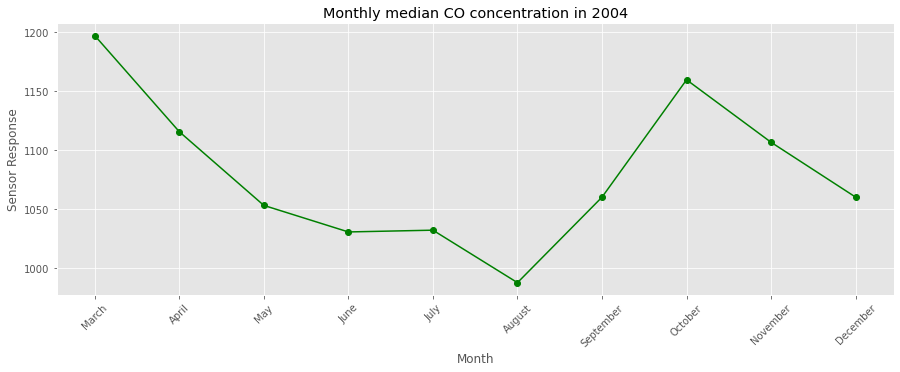

In [60]:
months_2004 = aq_2004_df['DateTime'].dt.month_name().unique()
plt.figure(figsize=(15, 5))
plt.style.use('ggplot')
plt.title('Monthly median CO concentration in 2004')
plt.plot(group_2004_month['Month'].median(), group_2004_month.median()['PT08.S1(CO)'], 'g-o')
plt.xticks(ticks=group_2004_month['Month'].median(), labels=months_2004, rotation = 45)
plt.xlabel('Month')
plt.ylabel('Sensor Response')
plt.grid(True)
plt.show()

In [61]:
group_2004_month['Month'].median()

Month
3      3
4      4
5      5
6      6
7      7
8      8
9      9
10    10
11    11
12    12
Name: Month, dtype: int64

In [62]:
common_months = []
for month in aq_2004_df['Month'].unique():
    if month in aq_2005_df['Month'].unique():
        common_months.append(month)
        
common_month_names = []
for month_name in aq_2004_df['DateTime'].dt.month_name().unique():
    if month_name in aq_2005_df['DateTime'].dt.month_name().unique():
        common_month_names.append(month_name)
        
print(common_months)
print(common_month_names)

[3, 4]
['March', 'April']


In [63]:
# Create a dataframe for the year 2004 that contains records for only March & April

aq_2004_common_months = aq_2004_df[aq_2004_df['Month'] <5]
aq_2004_common_months

DateTime  PT08.S1(CO)  C6H6(GT)  PT08.S2(NMHC)  PT08.S3(NOx)  \
0    2004-03-10 18:00:00       1360.0      11.9         1046.0        1056.0   
1    2004-03-10 19:00:00       1292.0       9.4          955.0        1174.0   
2    2004-03-10 20:00:00       1402.0       9.0          939.0        1140.0   
3    2004-03-10 21:00:00       1376.0       9.2          948.0        1092.0   
4    2004-03-10 22:00:00       1272.0       6.5          836.0        1205.0   
...                  ...          ...       ...            ...           ...   
1225 2004-04-30 19:00:00       1626.0      26.9         1476.0         555.0   
1226 2004-04-30 20:00:00       1449.0      19.5         1282.0         625.0   
1227 2004-04-30 21:00:00       1363.0      15.1         1152.0         684.0   
1228 2004-04-30 22:00:00       1371.0      14.6         1136.0         689.0   
1229 2004-04-30 23:00:00       1406.0      13.7         1107.0         718.0   

      PT08.S4(NO2)  PT08.S5(O3)     T    RH      AH  Day  Month  Year  \
0           1692.0       1268.0  13.6  48.9  0.7578   10      3  2004   
1           1559.0        972.0  13.3  47.7  0.7255   10      3  2004   
2           1555.0       1074.0  11.9  54.0  0.7502   10      3  2004   
3           1584.0       1203.0  11.0  60.0  0.7867   10      3  2004   
4           1490.0       1110.0  11.2  59.6  0.7888   10      3  2004   
...            ...          ...   ...   ...     ...  ...    ...   ...   
1225        2356.0       1786.0  19.8  58.6  1.3392   30      4  2004   
1226        2100.0       1569.0  19.1  61.1  1.3345   30      4  2004   
1227        1951.0       1495.0  18.2  65.4  1.3529   30      4  2004   
1228        1927.0       1471.0  18.1  66.1  1.3579   30      4  2004   
1229        1872.0       1384.0  17.7  66.9  1.3422   30      4  2004   

       Day Name  
0     Wednesday  
1     Wednesday  
2     Wednesday  
3     Wednesday  
4     Wednesday  
...         ...  
1225     Friday  
1226     Friday  
1227     Friday  
1228     Friday  
1229     Friday  

[1230 rows x 14 columns]

In [64]:
# Create a dataframe for the year 2005 that contains records for only March & April

aq_2005_common_months = aq_2005_df[aq_2005_df['Month'] >2]
aq_2005_common_months

DateTime  PT08.S1(CO)  C6H6(GT)  PT08.S2(NMHC)  PT08.S3(NOx)  \
8526 2005-03-01 00:00:00        766.0       1.2          515.0        1327.0   
8527 2005-03-01 01:00:00        762.0       0.9          487.0        1364.0   
8528 2005-03-01 02:00:00        736.0       0.6          453.0        1498.0   
8529 2005-03-01 03:00:00        715.0       0.2          387.0        1791.0   
8530 2005-03-01 04:00:00        716.0       0.2          390.0        1804.0   
...                  ...          ...       ...            ...           ...   
9352 2005-04-04 10:00:00       1314.0      13.5         1101.0         539.0   
9353 2005-04-04 11:00:00       1163.0      11.4         1027.0         604.0   
9354 2005-04-04 12:00:00       1142.0      12.4         1063.0         603.0   
9355 2005-04-04 13:00:00       1003.0       9.5          961.0         702.0   
9356 2005-04-04 14:00:00       1071.0      11.9         1047.0         654.0   

      PT08.S4(NO2)  PT08.S5(O3)     T    RH      AH  Day  Month  Year Day Name  
8526         642.0        322.0   1.0  37.4  0.2487    1      3  2005  Tuesday  
8527         640.0        307.0   0.7  41.2  0.2693    1      3  2005  Tuesday  
8528         602.0        268.0   0.2  40.6  0.2566    1      3  2005  Tuesday  
8529         559.0        227.0   0.1  40.0  0.2499    1      3  2005  Tuesday  
8530         551.0        221.0  -0.1  37.5  0.2326    1      3  2005  Tuesday  
...            ...          ...   ...   ...     ...  ...    ...   ...      ...  
9352        1374.0       1729.0  21.9  29.3  0.7568    4      4  2005   Monday  
9353        1264.0       1269.0  24.3  23.7  0.7119    4      4  2005   Monday  
9354        1241.0       1092.0  26.9  18.3  0.6406    4      4  2005   Monday  
9355        1041.0        770.0  28.3  13.5  0.5139    4      4  2005   Monday  
9356        1129.0        816.0  28.5  13.1  0.5028    4      4  2005   Monday  

[831 rows x 14 columns]

In [65]:
# Group the dataframe for the year 2004 such that we have monthly median values for March & April
group_2004_common_months = group_2004_month.median()[group_2004_month['Month'].median() < 5]
group_2004_common_months

PT08.S1(CO)  C6H6(GT)  PT08.S2(NMHC)  PT08.S3(NOx)  PT08.S4(NO2)  \
Month                                                                     
3           1197.0      8.65          926.0         966.5        1543.0   
4           1115.5      8.80          931.0         882.0        1555.0   

       PT08.S5(O3)      T    RH       AH   Day    Year  
Month                                                   
3            992.5  14.05  52.2  0.79205  21.0  2004.0  
4            949.0  16.30  50.1  0.92410  15.5  2004.0

In [66]:
group_2005_common_months = group_2005_month.median()[group_2005_month['Month'].median() >2]
group_2005_common_months

PT08.S1(CO)  C6H6(GT)  PT08.S2(NMHC)  PT08.S3(NOx)  PT08.S4(NO2)  \
Month                                                                     
3           1126.0       6.6          841.0         684.5        1217.0   
4            925.0       3.3          669.0         906.0         936.0   

       PT08.S5(O3)     T    RH      AH   Day    Year  
Month                                                 
3           1039.5  13.5  51.8  0.7834  16.0  2005.0  
4            556.0  15.1  35.6  0.5977   2.0  2005.0

In [67]:
group_2004_common_months.index

Int64Index([3, 4], dtype='int64', name='Month')

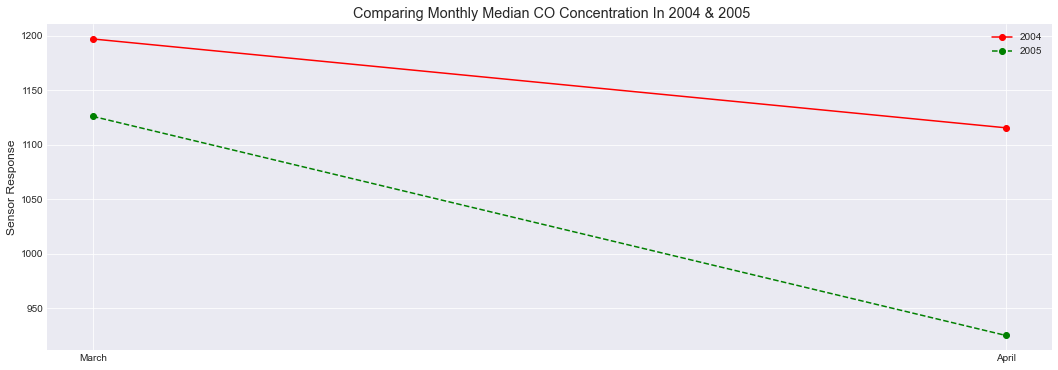

In [68]:

plt.style.use('seaborn-dark')
plt.figure(figsize=(18, 6))
plt.title(' Comparing Monthly Median CO Concentration In 2004 & 2005')
plt.plot(common_months, group_2004_common_months['PT08.S1(CO)'], 'r-o', label='2004')
plt.plot(common_months, group_2005_common_months['PT08.S1(CO)'], 'go--', label='2005')
# Since we are already labelling 'x-axis' with month names, labelling it with 'Month' term is unnecessary.
plt.ylabel('Sensor Response')
plt.xticks(ticks=common_months, labels = common_month_names)
plt.legend()
plt.grid(True)
plt.show()

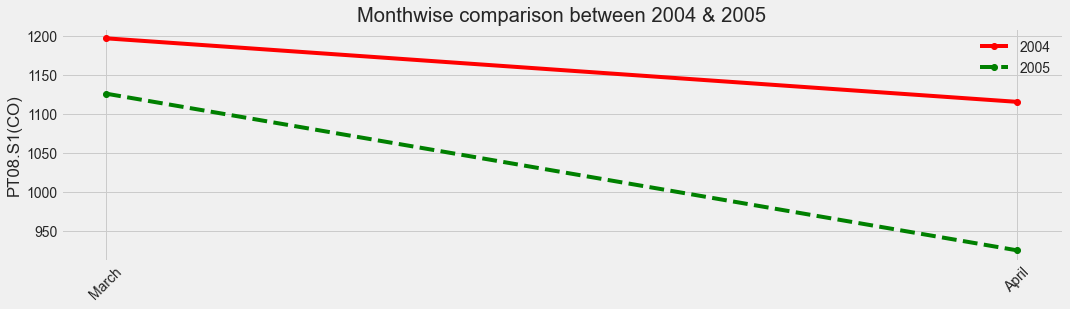

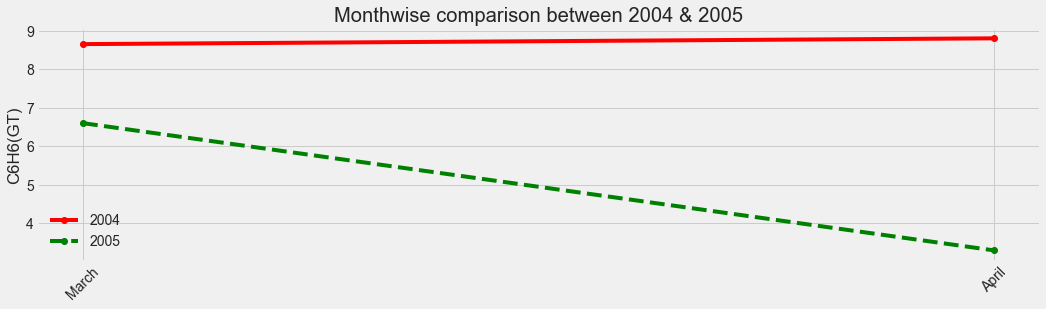

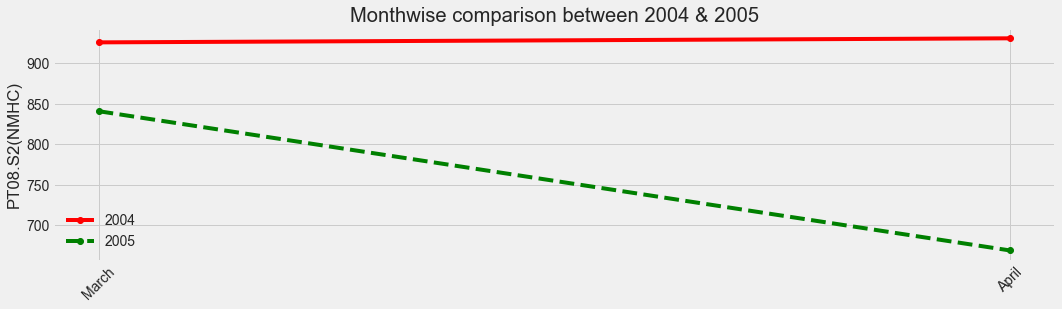

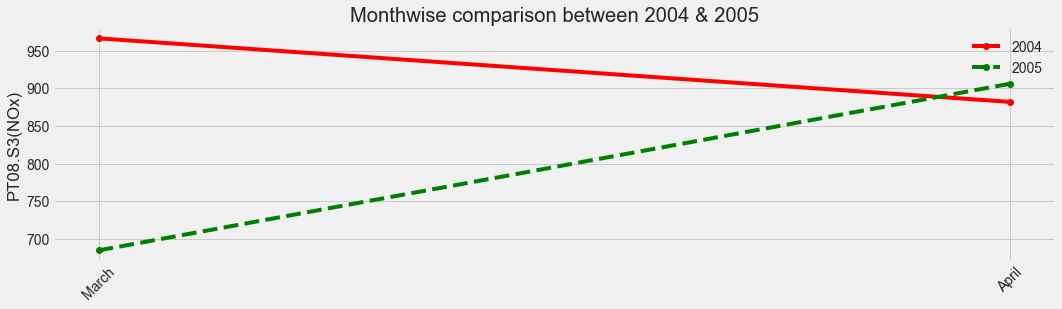

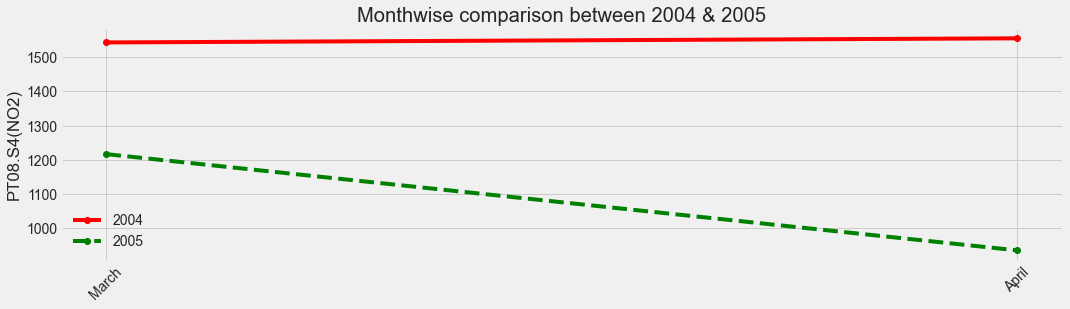

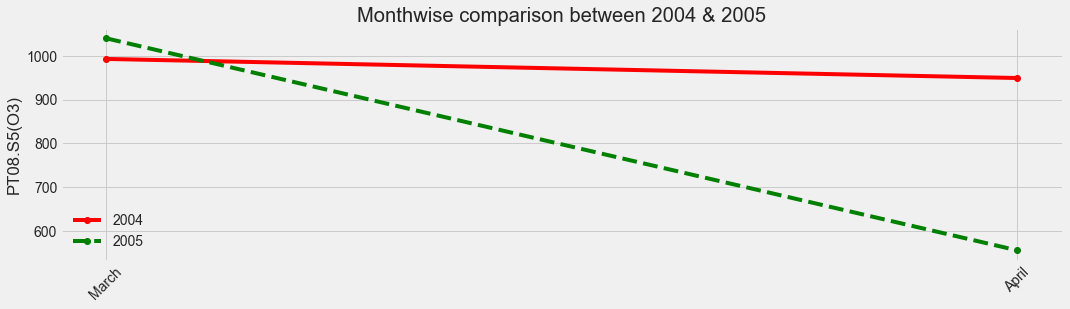

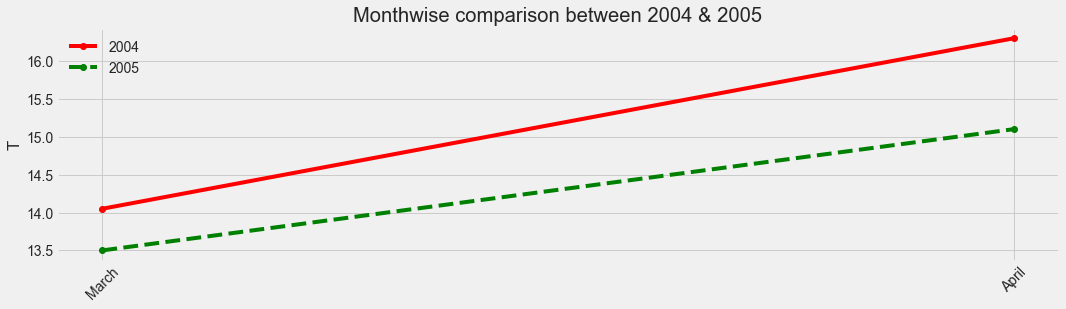

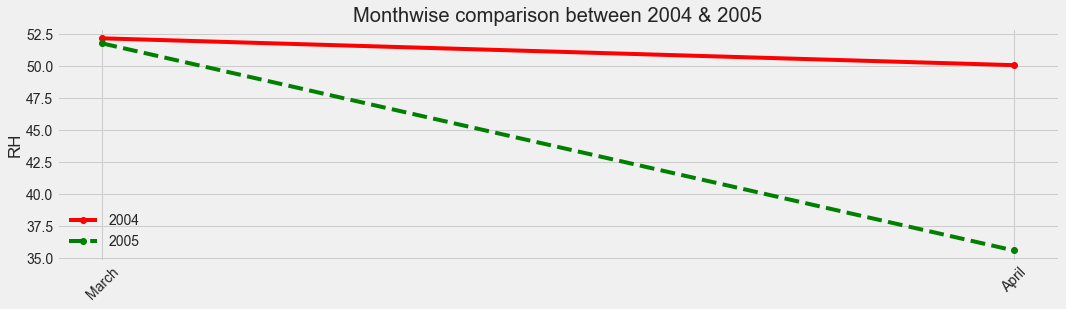

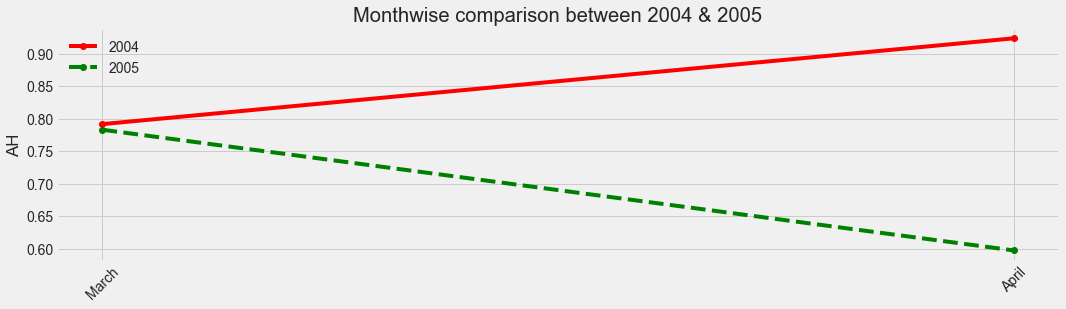

In [69]:
plt.style.use('fivethirtyeight')
for col in group_2004_common_months.columns[0:-2]:
    plt.figure(figsize=(16, 4))
    plt.title('Monthwise comparison between 2004 & 2005')
    plt.plot(common_months, group_2004_common_months[col], 'r-o', label='2004')
    plt.plot(common_months, group_2005_common_months[col], 'go--', label='2005')
    # Since we are already labelling 'x-axis' with month names, labelling it with 'Month' term is unnecessary.
    plt.ylabel(col)
    plt.xticks(ticks=common_months, labels = common_month_names, rotation =45)
    plt.legend()
    plt.grid(True)
    plt.show()

In [70]:
def line_plot(style, width, height, x_series, y_series, year, colour):
    plt.style.use(style)
    plt.figure(figsize=(width, height))
    plt.title(f"\ntime series plot for {y_series.name} in {year}")
    plt.plot(x_series, y_series, colour)
    plt.xticks(rotation = 45)
    plt.ylabel(col)
    plt.grid(True)
    plt.show()

In [71]:
aq_2004_df.head()

DateTime  PT08.S1(CO)  C6H6(GT)  PT08.S2(NMHC)  PT08.S3(NOx)  \
0 2004-03-10 18:00:00       1360.0      11.9         1046.0        1056.0   
1 2004-03-10 19:00:00       1292.0       9.4          955.0        1174.0   
2 2004-03-10 20:00:00       1402.0       9.0          939.0        1140.0   
3 2004-03-10 21:00:00       1376.0       9.2          948.0        1092.0   
4 2004-03-10 22:00:00       1272.0       6.5          836.0        1205.0   

   PT08.S4(NO2)  PT08.S5(O3)     T    RH      AH  Day  Month  Year   Day Name  
0        1692.0       1268.0  13.6  48.9  0.7578   10      3  2004  Wednesday  
1        1559.0        972.0  13.3  47.7  0.7255   10      3  2004  Wednesday  
2        1555.0       1074.0  11.9  54.0  0.7502   10      3  2004  Wednesday  
3        1584.0       1203.0  11.0  60.0  0.7867   10      3  2004  Wednesday  
4        1490.0       1110.0  11.2  59.6  0.7888   10      3  2004  Wednesday

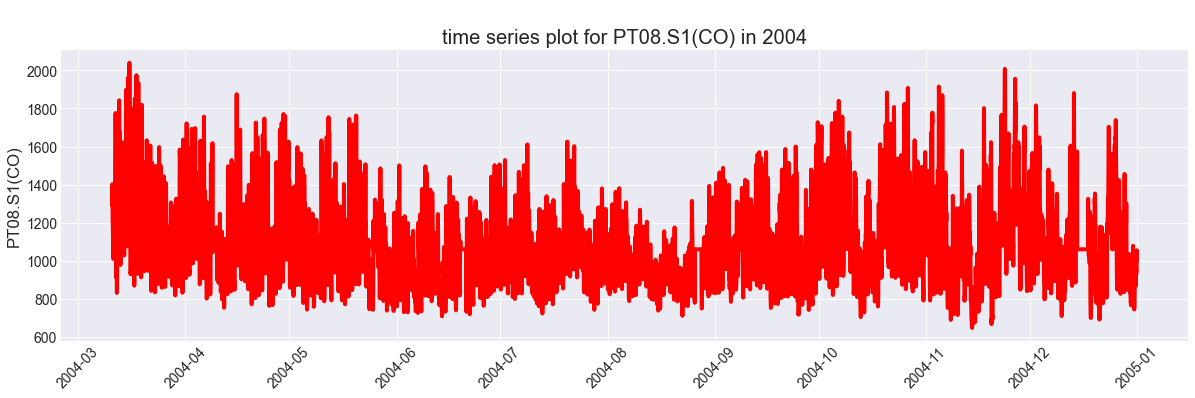

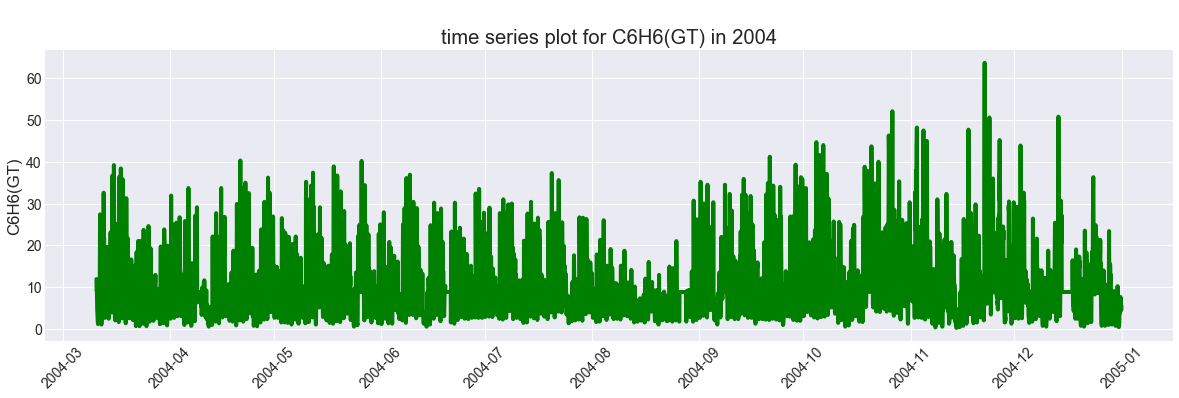

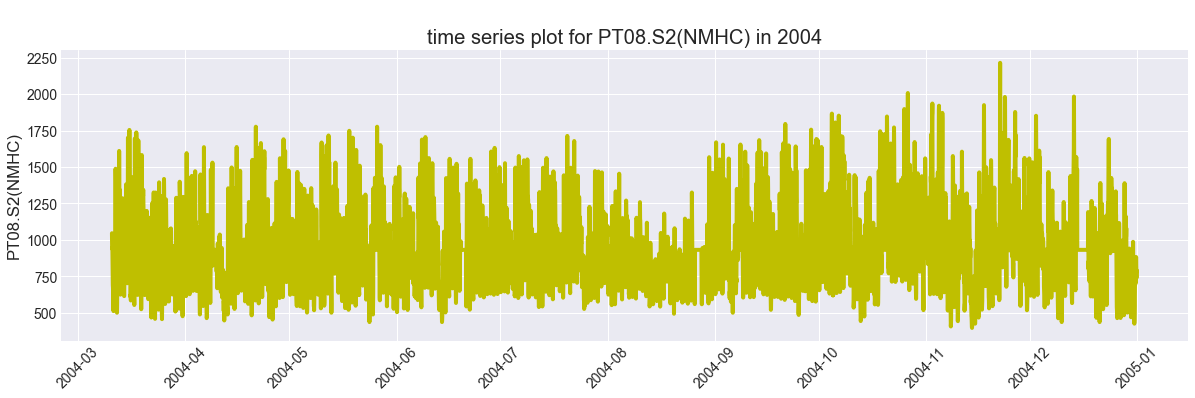

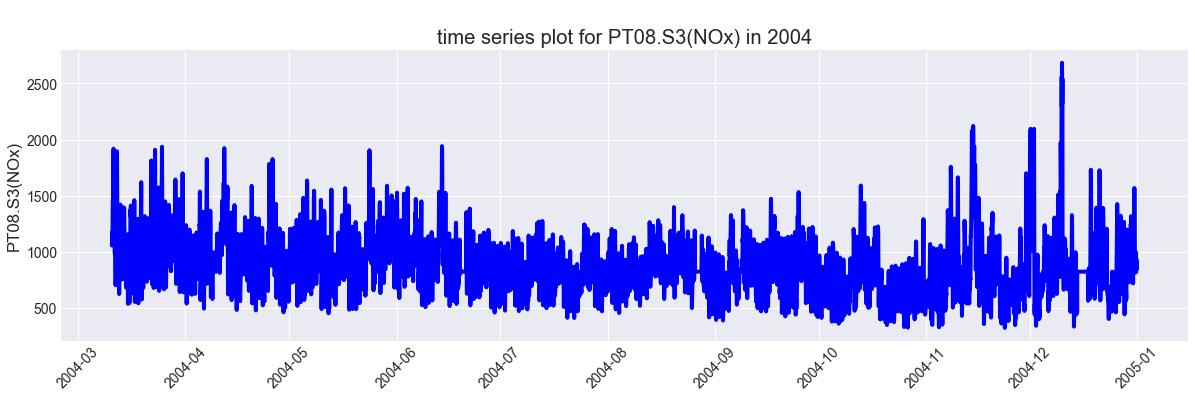

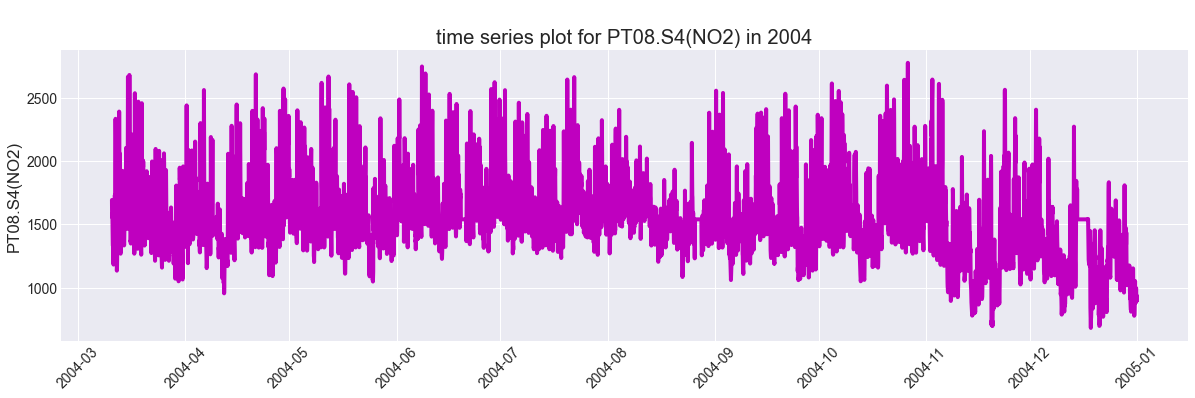

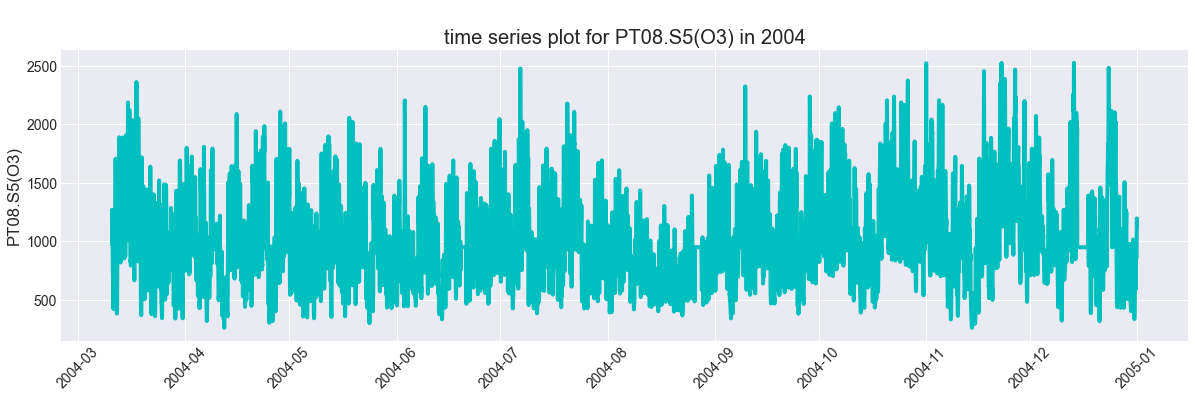

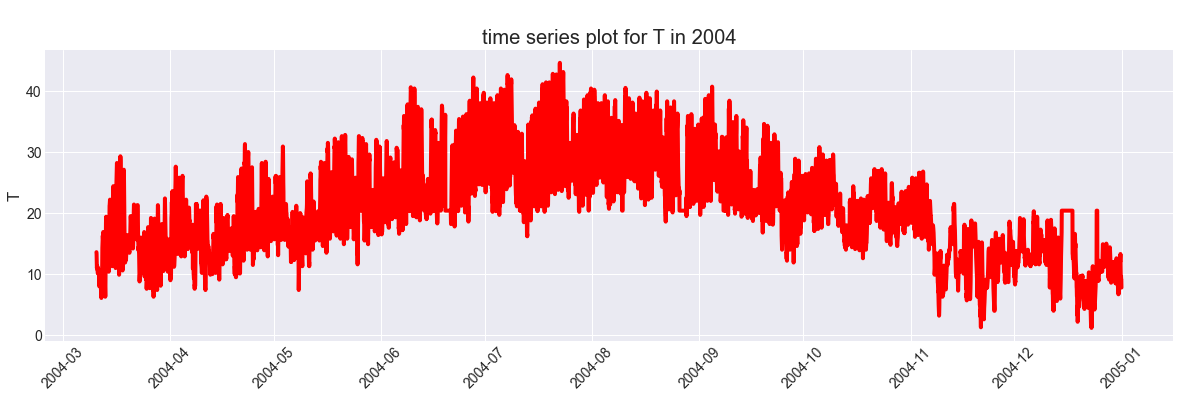

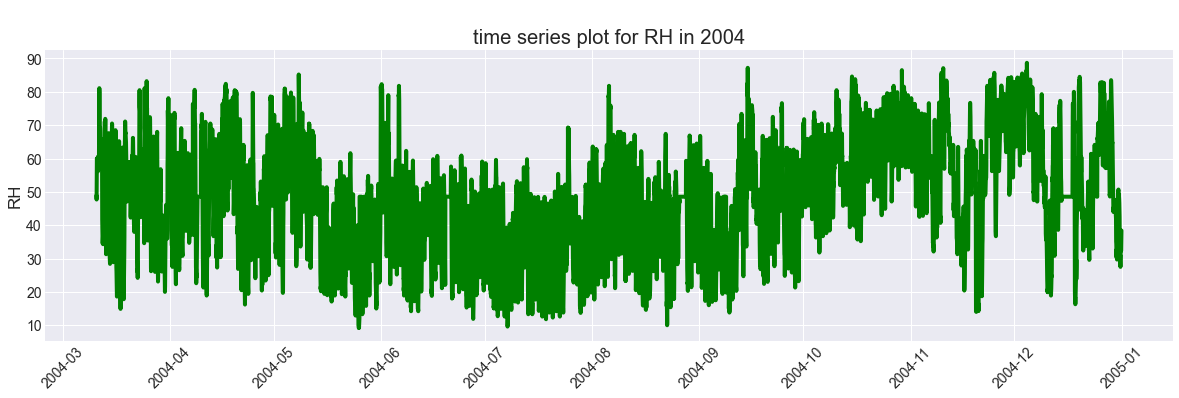

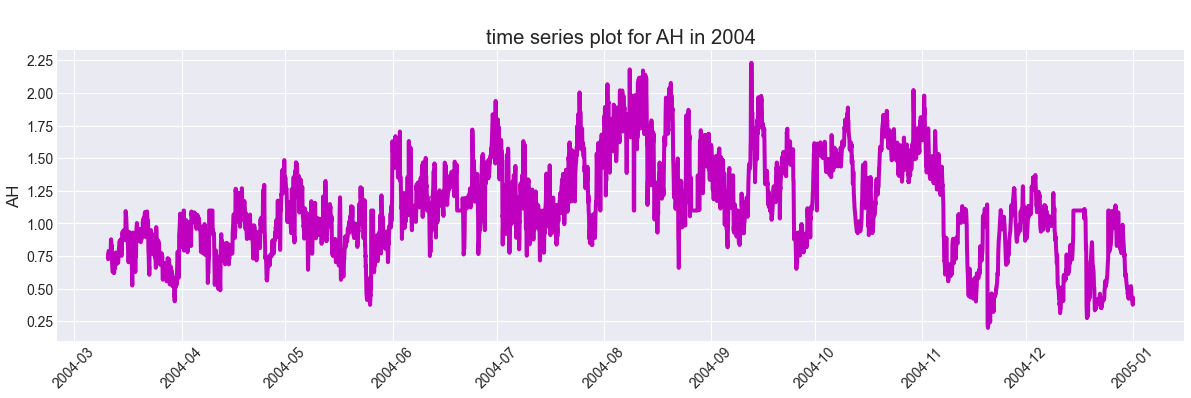

In [72]:
colors = ['r', 'g', 'y', 'b', 'm', 'c', 'r', 'g', 'm']
i = 0
for col in aq_2004_df.columns[1:-4]:
    line_plot('seaborn-dark',18,5,aq_2004_df['DateTime'],aq_2004_df[col],2004,colors[i])
    i += 1

In [73]:
df = pd.concat([aq_2004_df, aq_2005_df])
df.head()

DateTime  PT08.S1(CO)  C6H6(GT)  PT08.S2(NMHC)  PT08.S3(NOx)  \
0 2004-03-10 18:00:00       1360.0      11.9         1046.0        1056.0   
1 2004-03-10 19:00:00       1292.0       9.4          955.0        1174.0   
2 2004-03-10 20:00:00       1402.0       9.0          939.0        1140.0   
3 2004-03-10 21:00:00       1376.0       9.2          948.0        1092.0   
4 2004-03-10 22:00:00       1272.0       6.5          836.0        1205.0   

   PT08.S4(NO2)  PT08.S5(O3)     T    RH      AH  Day  Month  Year   Day Name  
0        1692.0       1268.0  13.6  48.9  0.7578   10      3  2004  Wednesday  
1        1559.0        972.0  13.3  47.7  0.7255   10      3  2004  Wednesday  
2        1555.0       1074.0  11.9  54.0  0.7502   10      3  2004  Wednesday  
3        1584.0       1203.0  11.0  60.0  0.7867   10      3  2004  Wednesday  
4        1490.0       1110.0  11.2  59.6  0.7888   10      3  2004  Wednesday

In [74]:
df.shape

(9357, 14)

In [113]:
df.to_csv('clean_air.csv', index=False)

In [75]:
months = df['DateTime'].dt.month_name().unique()
months

array(['March', 'April', 'May', 'June', 'July', 'August', 'September',
       'October', 'November', 'December', 'January', 'February'],
      dtype=object)

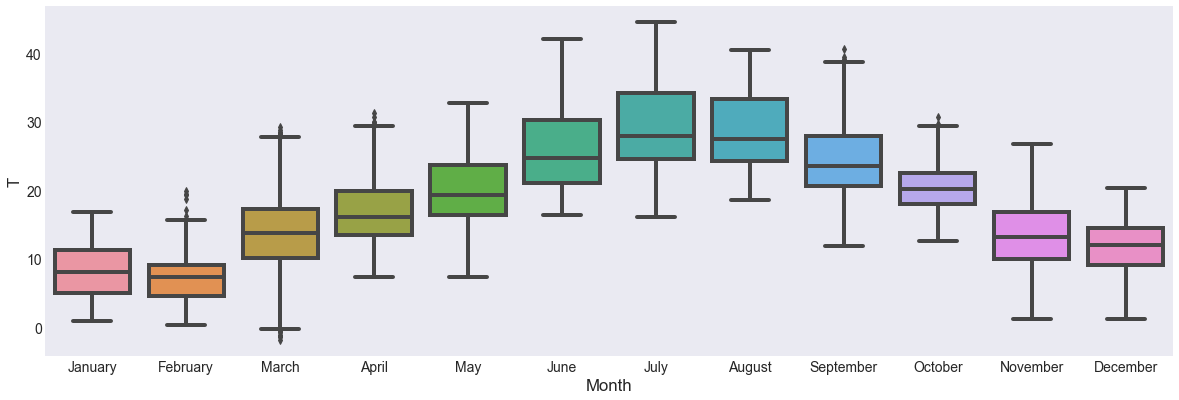

In [76]:
# Create a boxplot for monthwise variation in temperature

plt.figure(figsize=(18, 6))
sns.boxplot(x='Month', y='T', data=df)
plt.xticks(ticks=[i for i in range(12)], labels=list(months[-2:]) + list(months[:-2]))
plt.show()

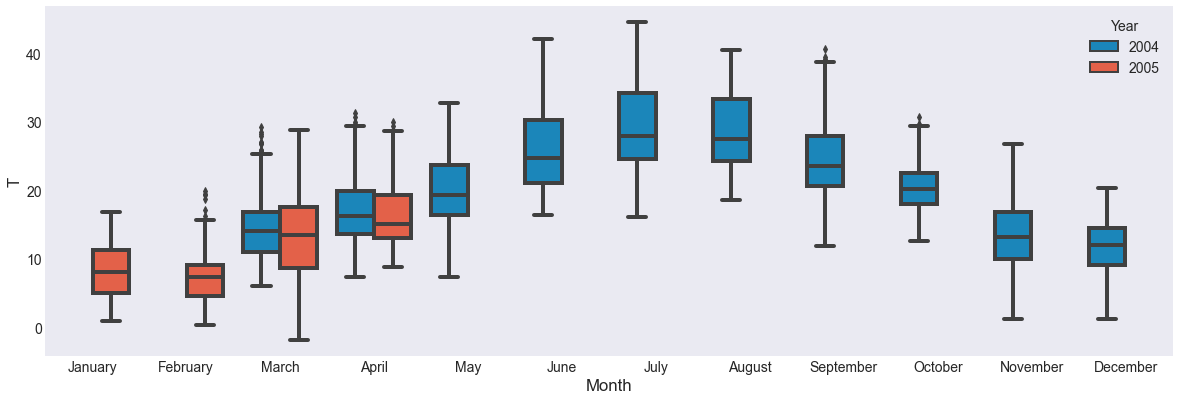

In [77]:
# Create a boxplot for monthwise variation in temperature split by year.

plt.figure(figsize=(18, 6))
sns.boxplot(x='Month', y='T', hue = 'Year', data=df)
plt.xticks(ticks=[i for i in range(12)], labels=list(months[-2:]) + list(months[:-2]))
plt.show()

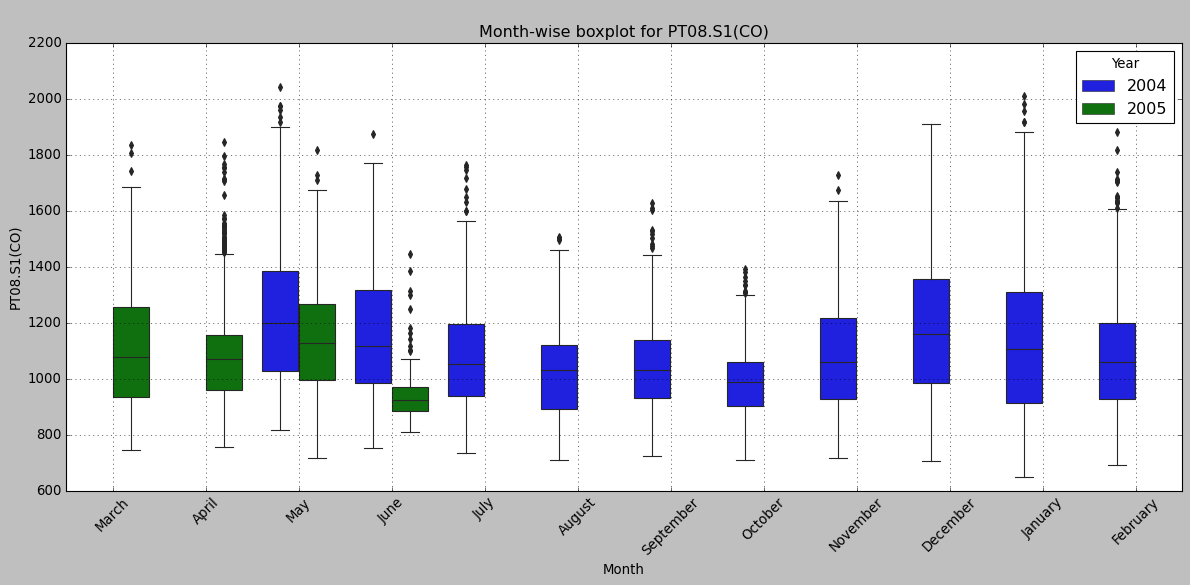

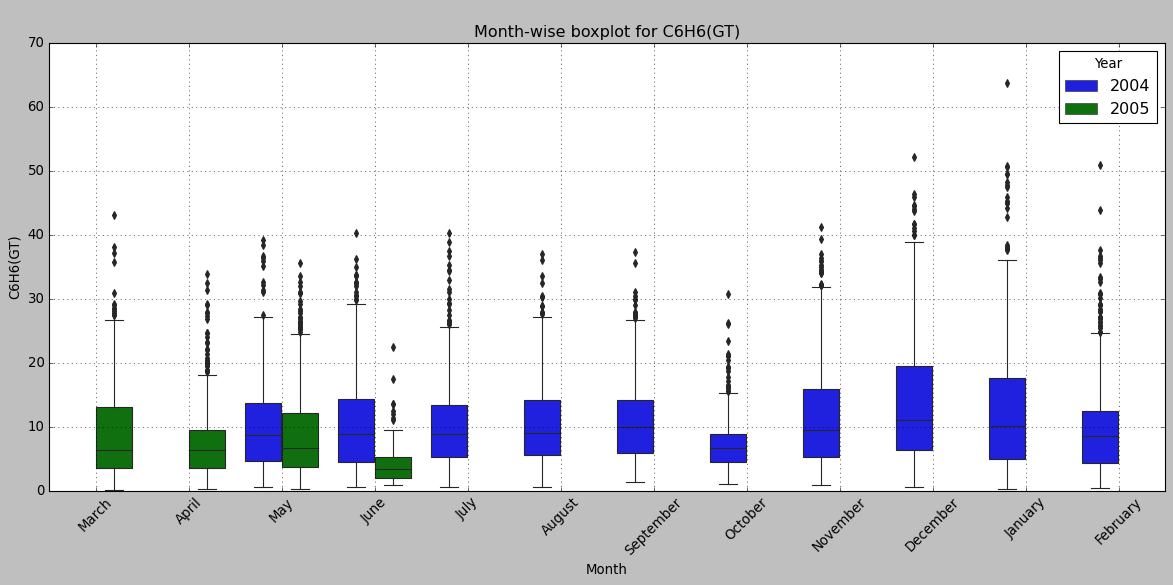

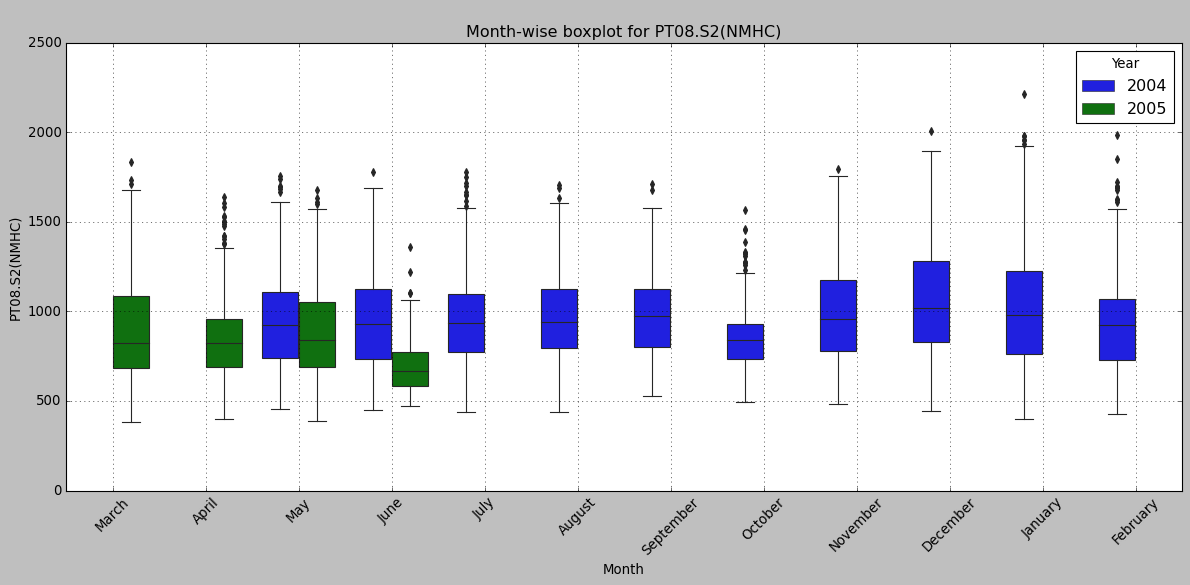

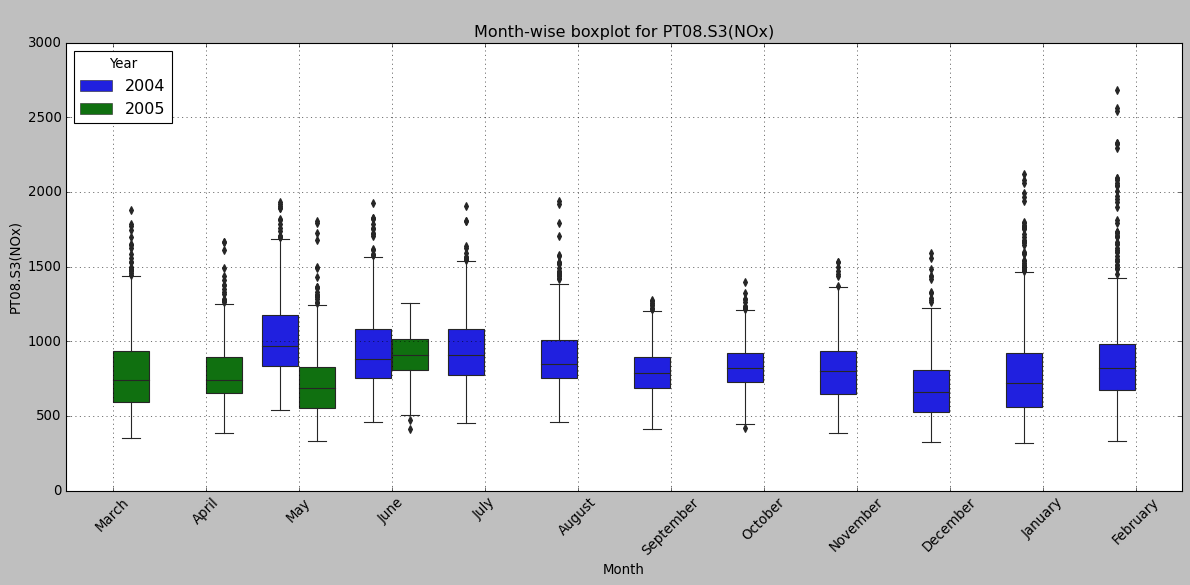

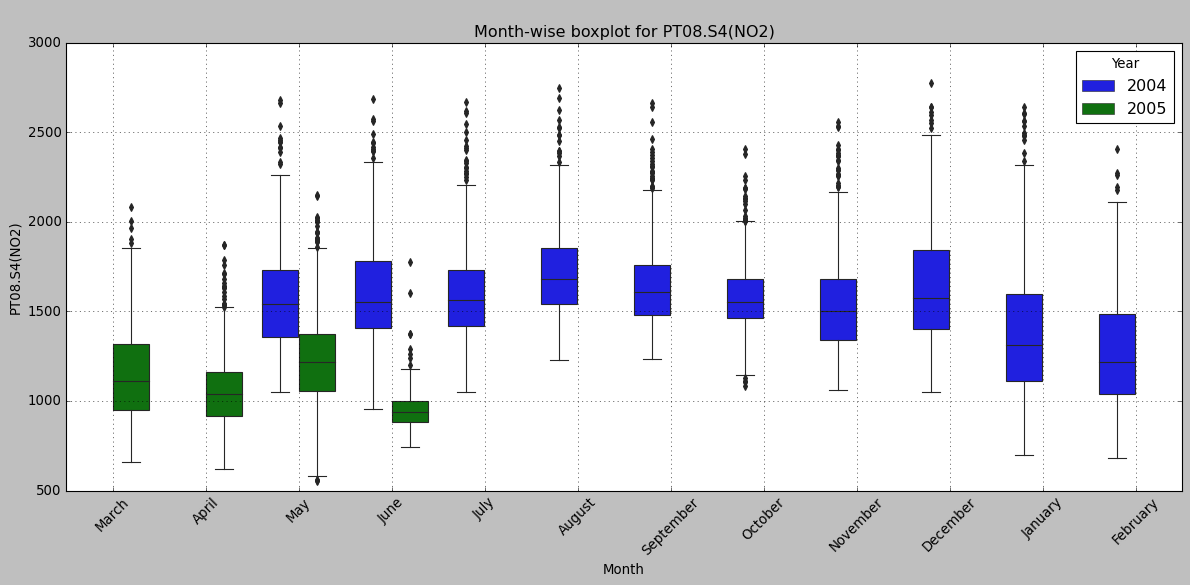

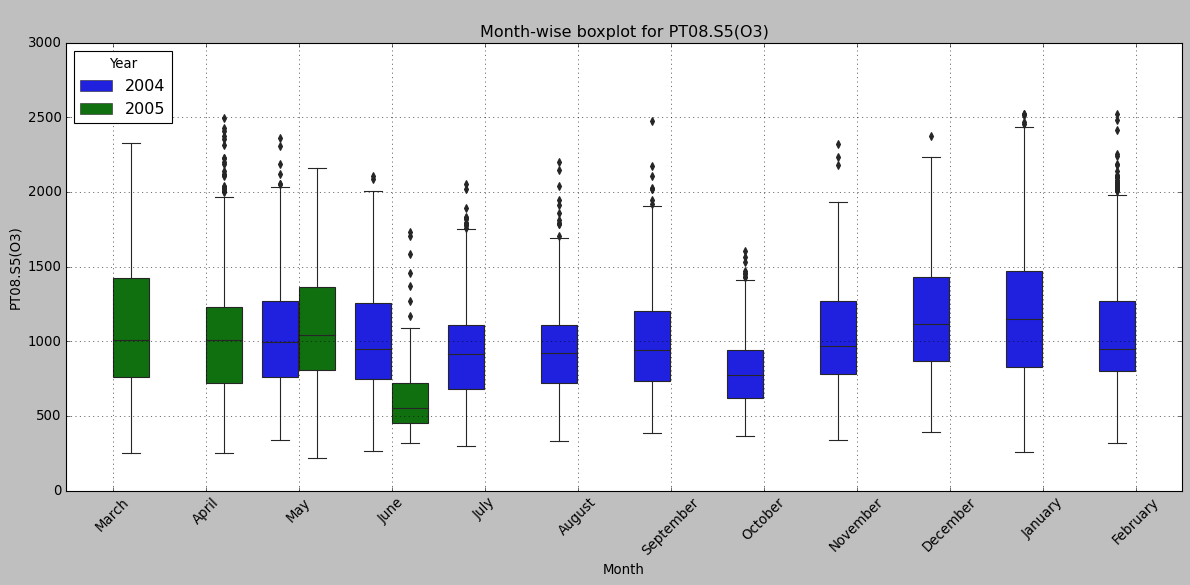

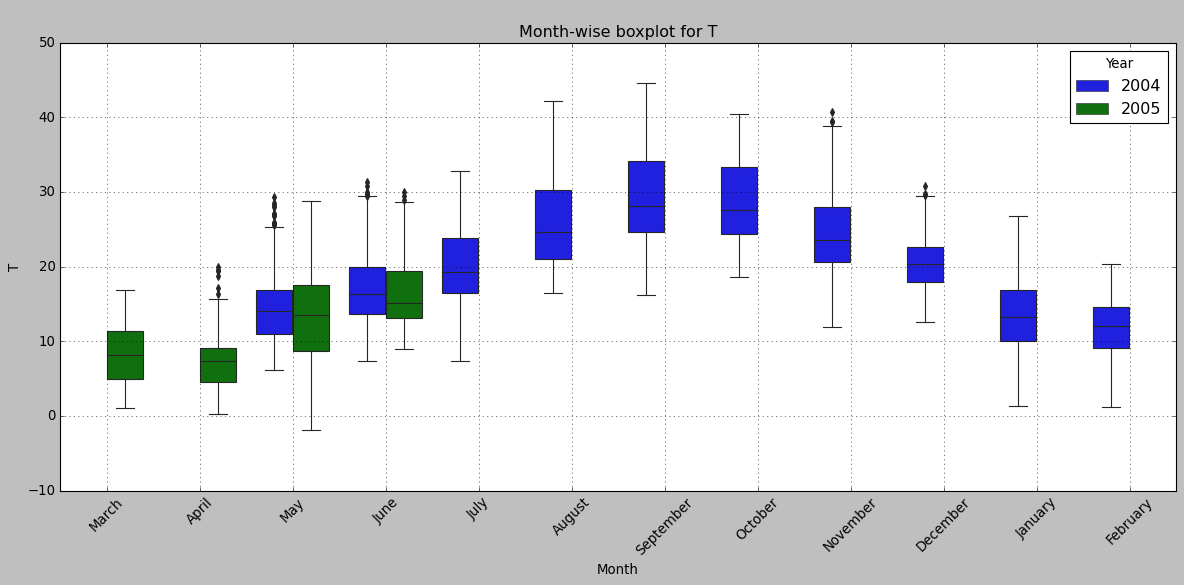

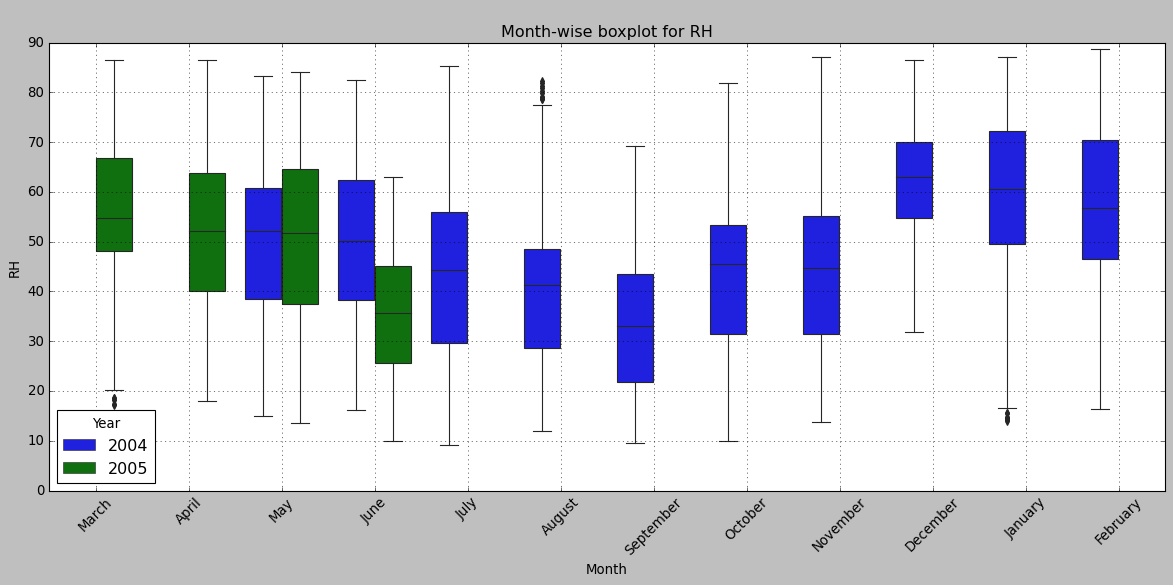

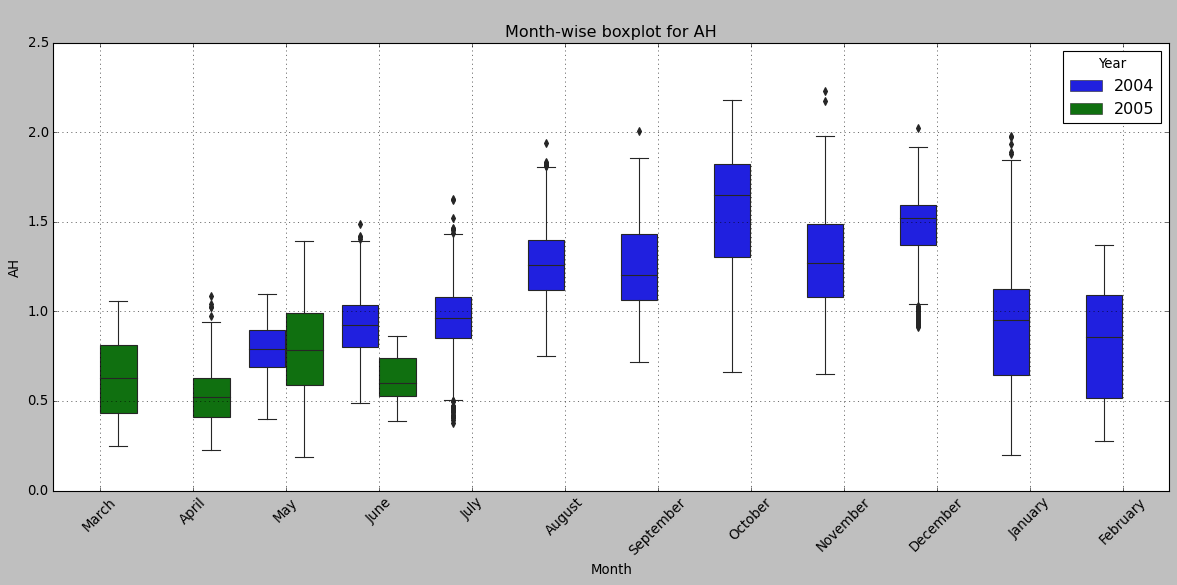

In [78]:
# Create the boxplot for month-wise concentrations of all the air pollutants, temperature and relative humidity.
# make sure to split the boxplots for each month by year. Use the 'classic' style this time

for col in df.columns[1:-4]:
    plt.style.use('classic')
    plt.figure(figsize=(18, 7))
    plt.title(f"\nMonth-wise boxplot for {col}")
    sns.boxplot(x='Month', y=col, hue='Year', data=df)
    plt.xticks(ticks=[i for i in range(12)], labels = months, rotation=45)
    plt.grid()
    plt.show()
    
# In October 2004, CO concentration is least & most in May 2004.
# In June 2005 CO concentration is least & is most in May.
# April 2005 data has many outliers

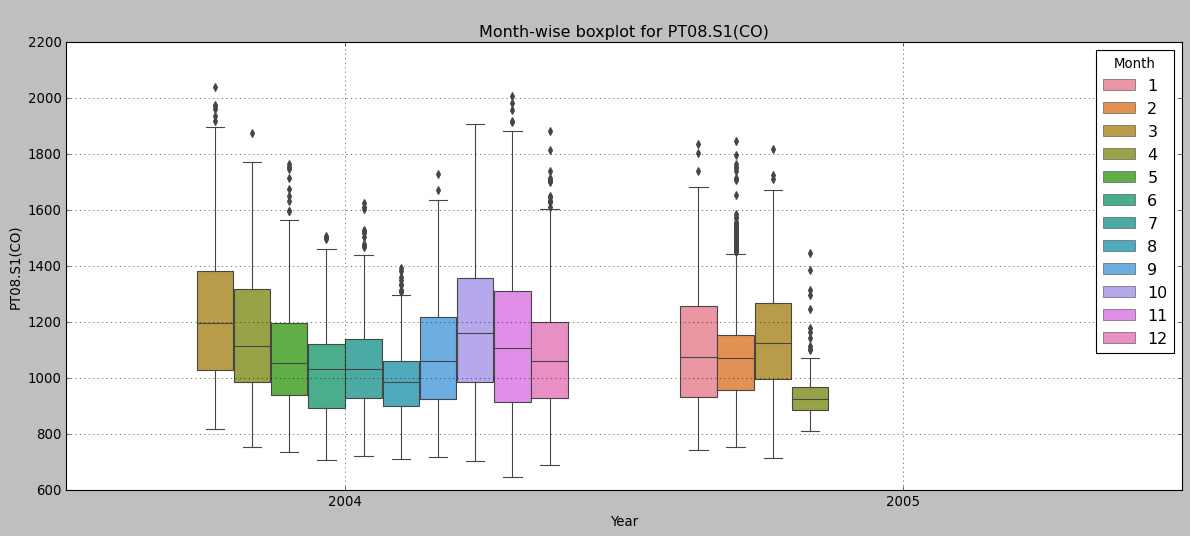

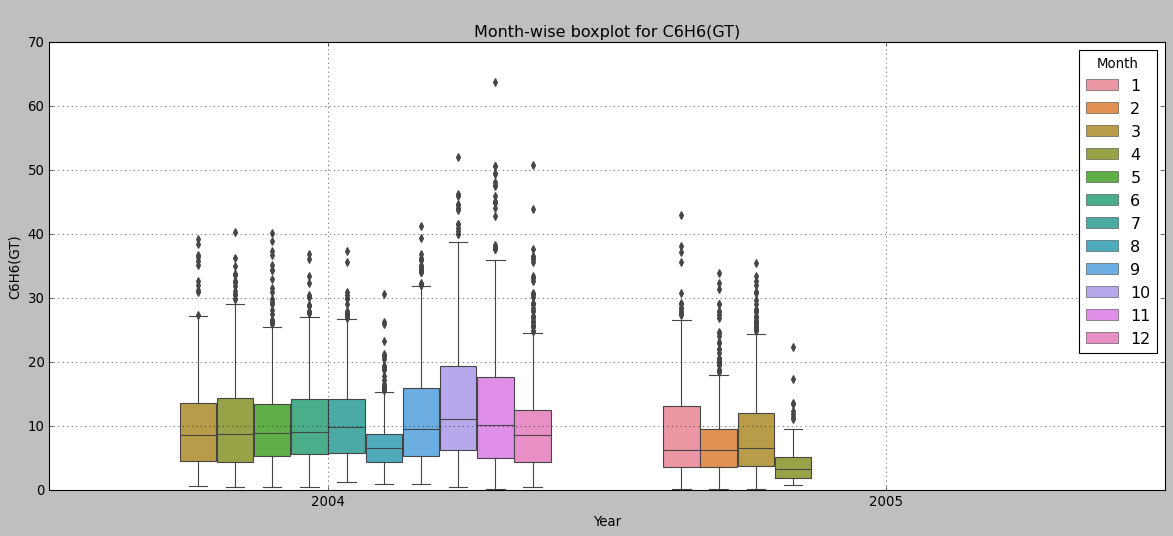

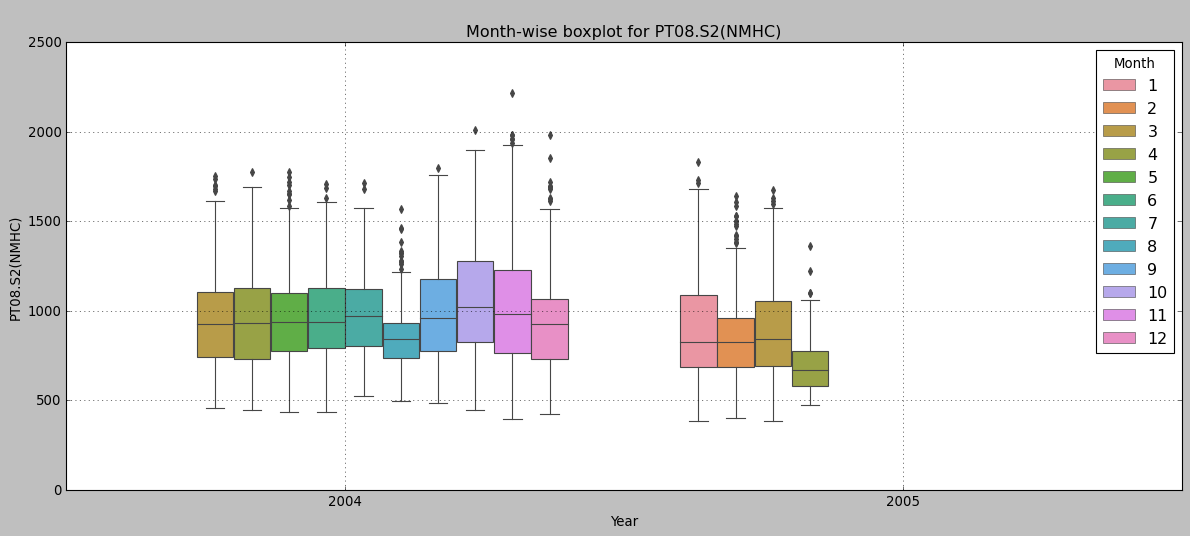

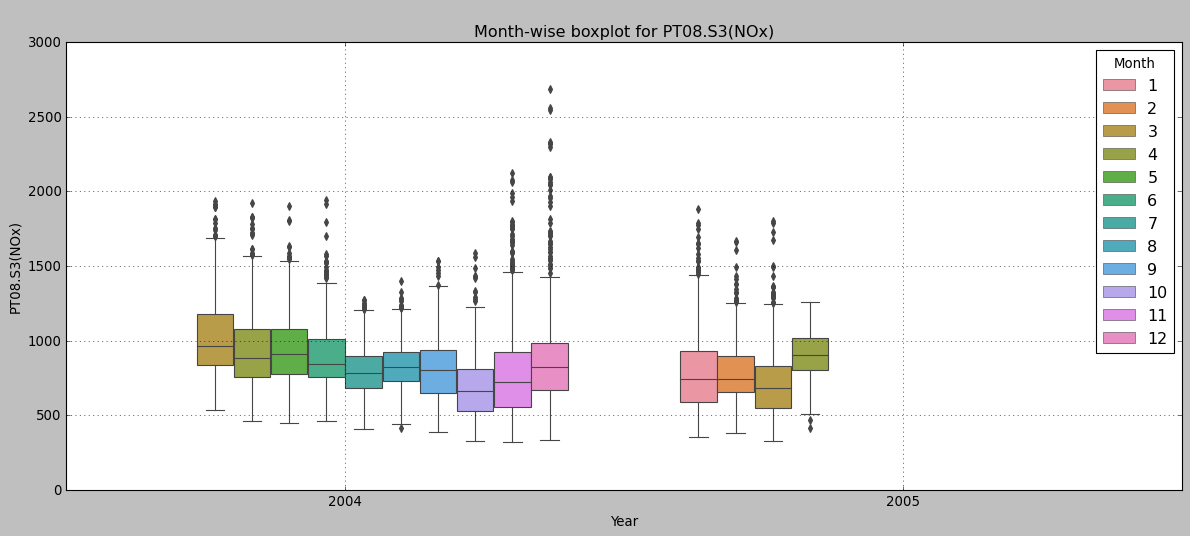

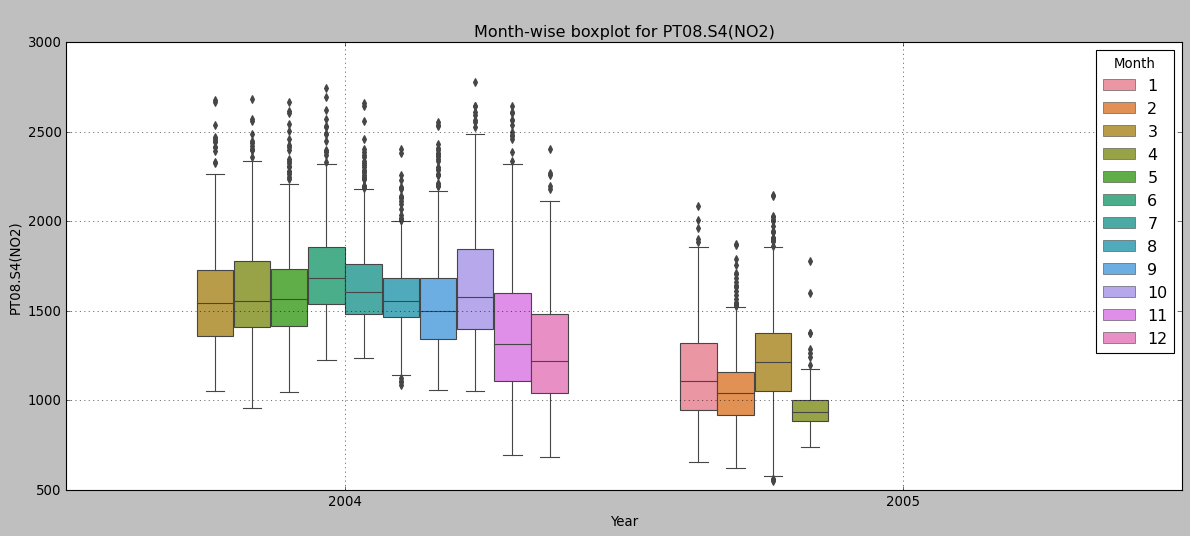

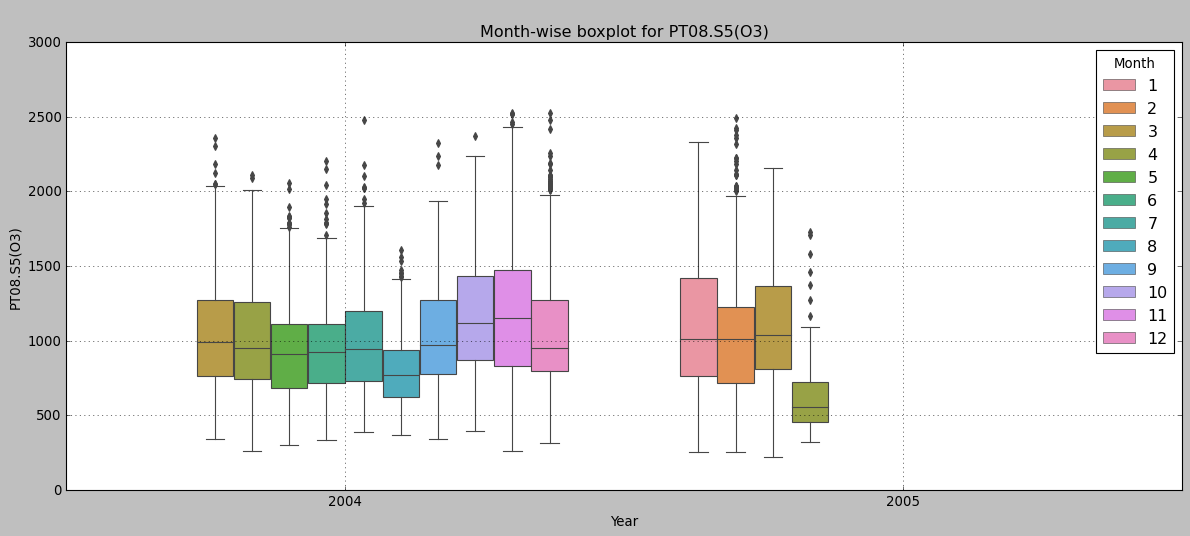

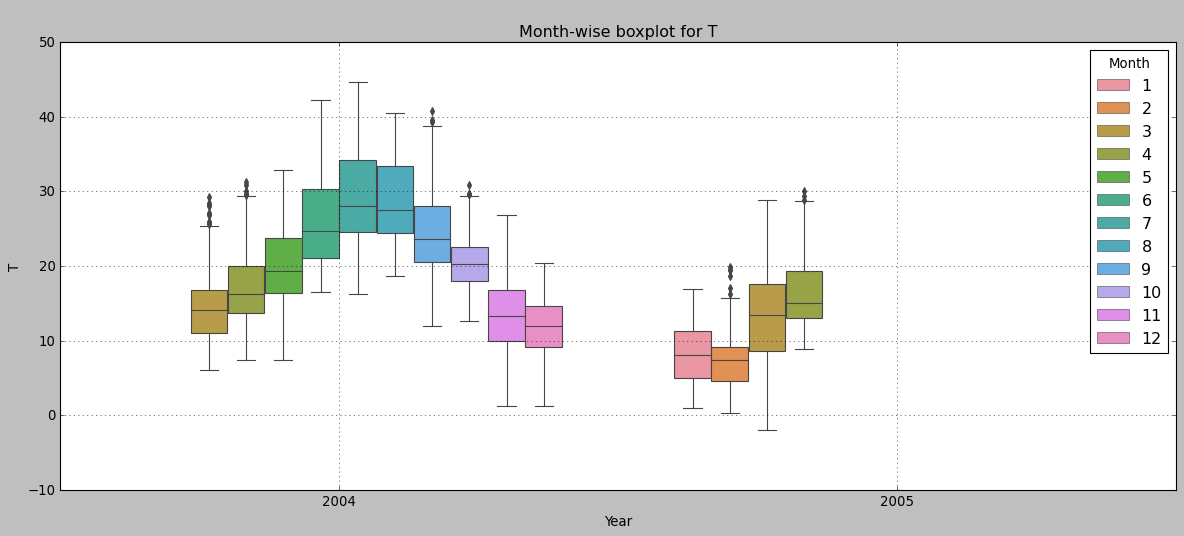

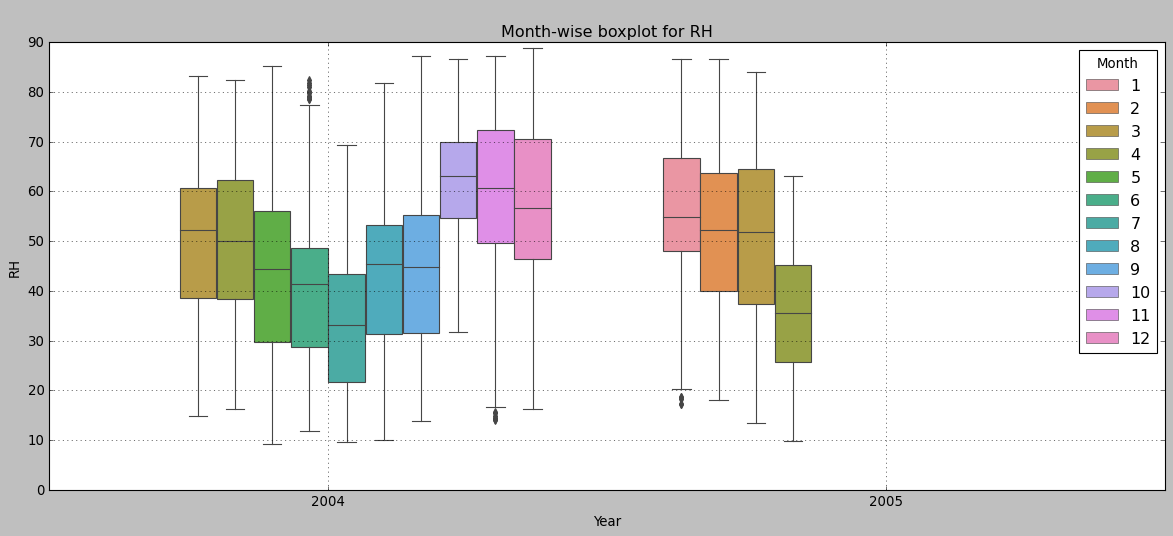

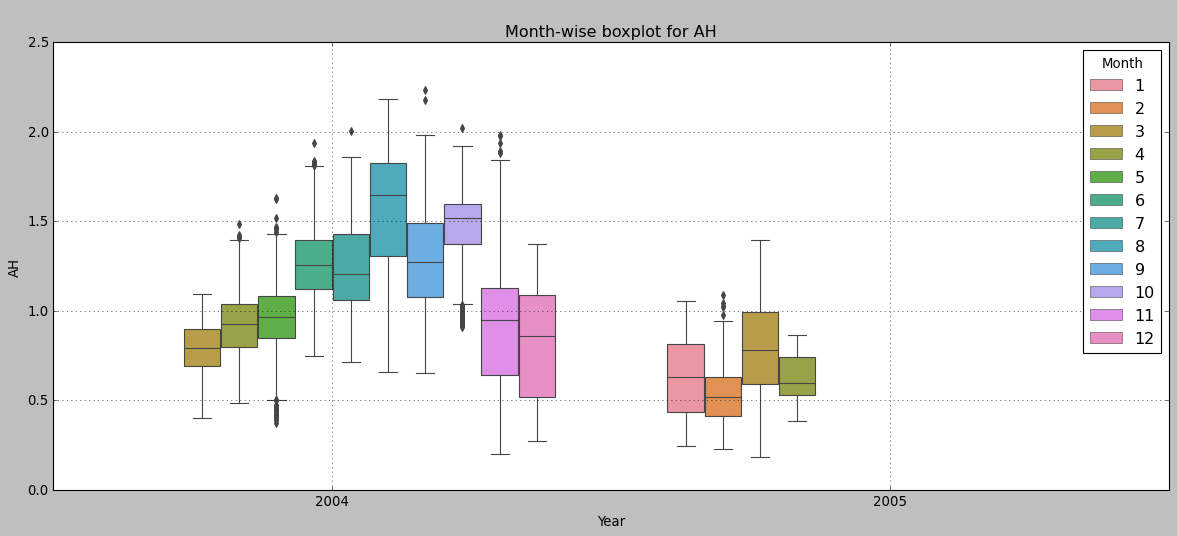

In [79]:
# Create the boxplot for year-wise concentrations of all the air pollutants, temperature and relative humidity.
# make sure to split the boxplots for each year by month.

for col in df.columns[1:-4]:
    plt.figure(figsize=(18, 7))
    plt.title(f"\nMonth-wise boxplot for {col}")
    sns.boxplot(x='Year', y=col, hue='Month', data=df)
    plt.grid()
    plt.show()

### Bivariate Bar Plot

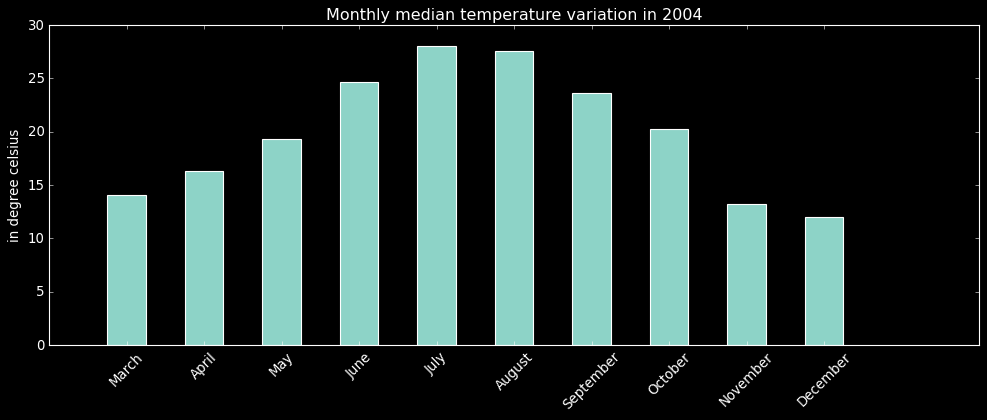

In [80]:
# Customize the above bar plot as per liking

plt.style.use('dark_background')
plt.figure(figsize=(15,5))
plt.title('Monthly median temperature variation in 2004')
plt.bar(x=np.arange(3, 13), height=group_2004_month.median()['T'], width=0.5)
plt.xticks(ticks=np.arange(3, 13), labels=months_2004, rotation=45)
plt.ylabel('in degree celsius')
plt.show()

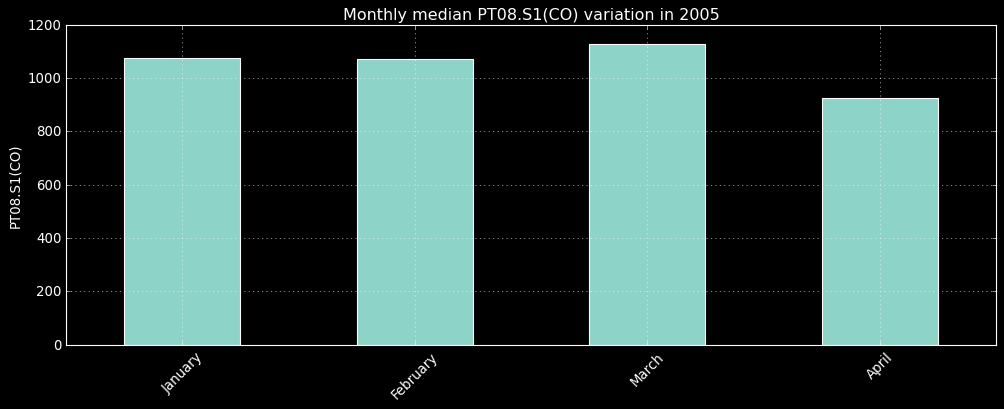

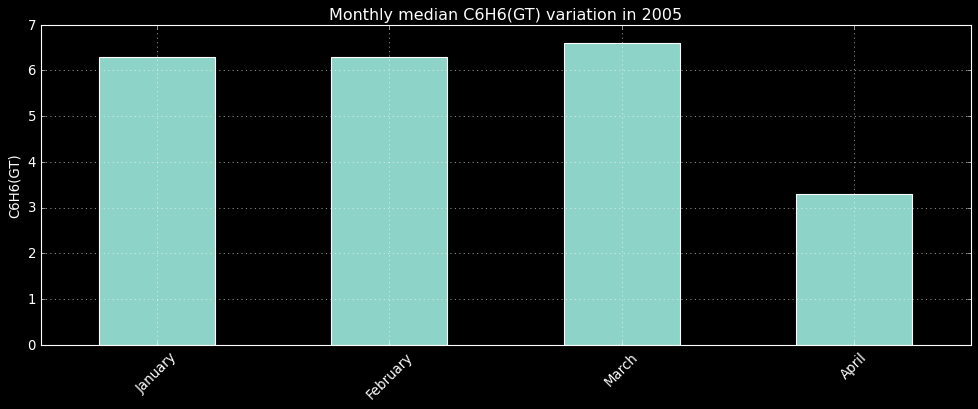

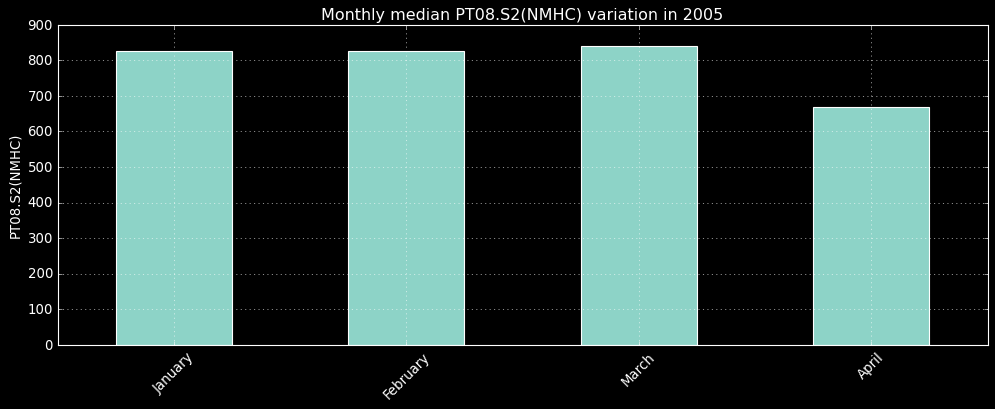

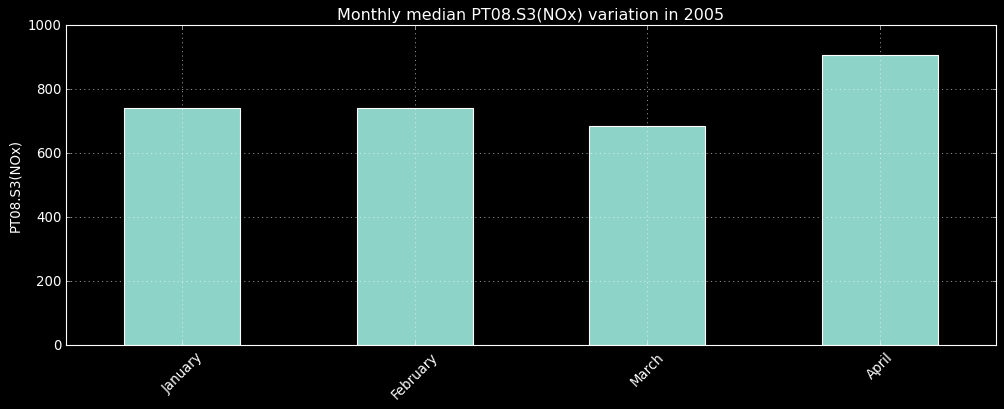

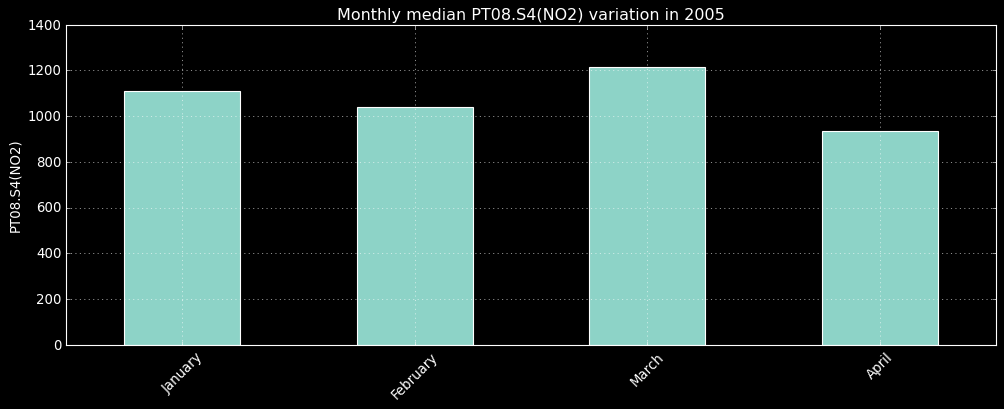

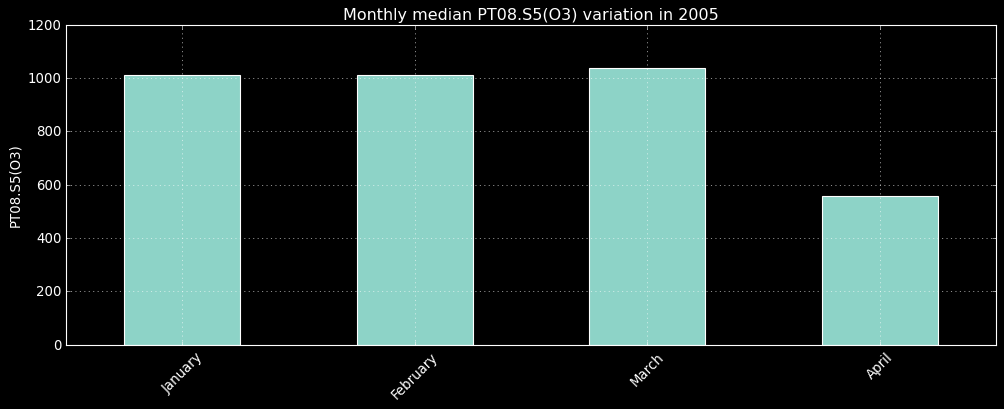

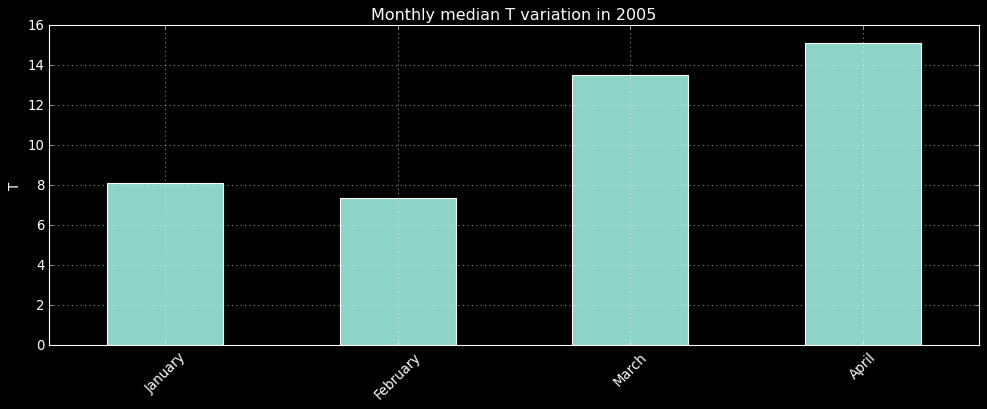

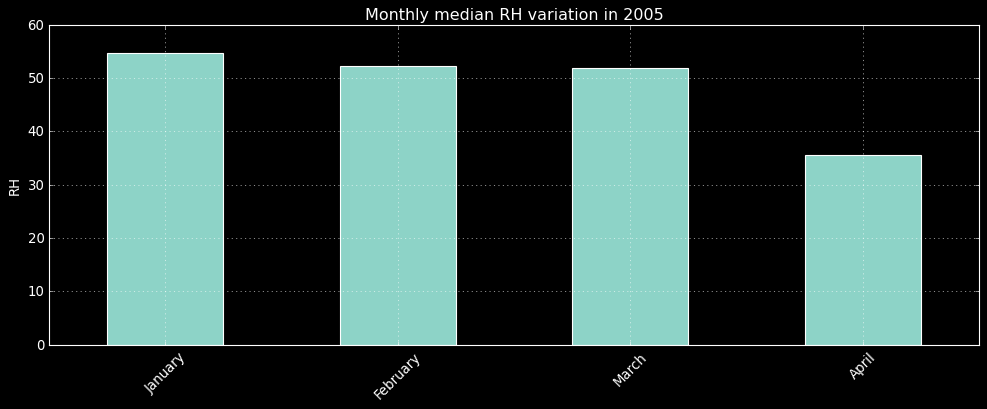

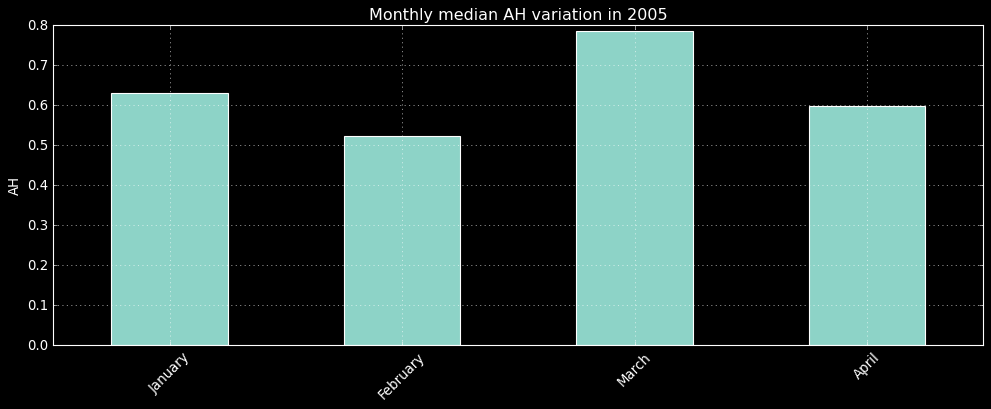

In [81]:
# Create month wise bar plots for all the air pollutants, temperature, 
# relative & absolute humidity in the DataFrame for the year 2005.

months_2005 = aq_2005_df['DateTime'].dt.month_name().unique()

for col in df.columns[1:-4]:
    plt.style.use('dark_background')
    plt.figure(figsize=(15,5))
    plt.title(f'Monthly median {col} variation in 2005')
    plt.bar(x=np.arange(1, 5), height=group_2005_month.median()[col], width=0.5)
    plt.xticks(ticks=np.arange(1, 5), labels=months_2005, rotation=45)
    plt.ylabel(col)
    plt.grid()
    plt.show()

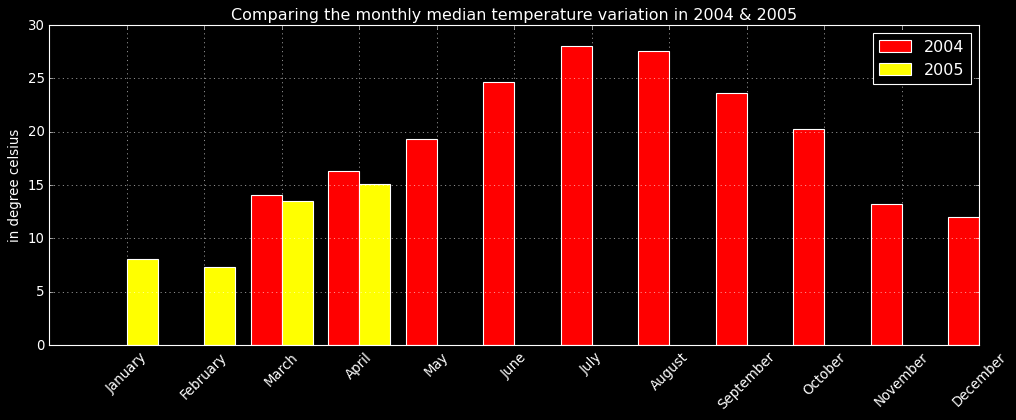

In [82]:
# Create a bar plot for both the DataFrames to compare the monthly median temperature variation in 2004 and 2005
# such that bars for a month for two different years are adjacent to each other.

bar_width = 0.4
plt.style.use('dark_background')
plt.figure(figsize=(15,5))
plt.title('Comparing the monthly median temperature variation in 2004 & 2005')
plt.bar(x=np.arange(3, 13)- bar_width/2 , height=group_2004_month.median()['T'], width=bar_width, color='red', label = '2004')
plt.bar(x=np.arange(1, 5)+ bar_width/2 , height=group_2005_month.median()['T'], width=bar_width, color='yellow', label = '2005')
plt.xticks(ticks=np.arange(1, 13), labels=list(months_2005) + list(months_2004[2:]), rotation=45)
plt.ylabel('in degree celsius')
plt.legend()
plt.grid()
plt.show()

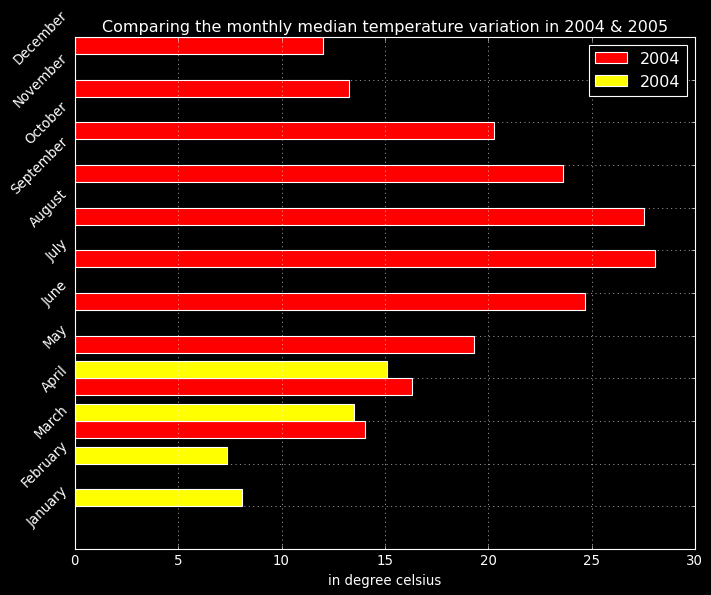

In [83]:
# Create a horizontal bar plot for both the DataFrames to compare the monthly median temperature variation in 2004 and 2005
# such that bars for a month for two different years are adjacent to each other.

bar_height = 0.4
plt.style.use('dark_background')
plt.figure(figsize=(10,8))
plt.title('Comparing the monthly median temperature variation in 2004 & 2005')
plt.barh(y=np.arange(3, 13)- bar_width/2 , width=group_2004_month.median()['T'], height=bar_height, color='red', label = '2004')
plt.barh(y=np.arange(1, 5)+ bar_width/2 , width=group_2005_month.median()['T'], height=bar_height, color='yellow', label = '2004')
plt.yticks(ticks=np.arange(1, 13), labels=list(months_2005) + list(months_2004[2:]), rotation=45)
plt.xlabel('in degree celsius')
plt.legend()
plt.grid()
plt.show()


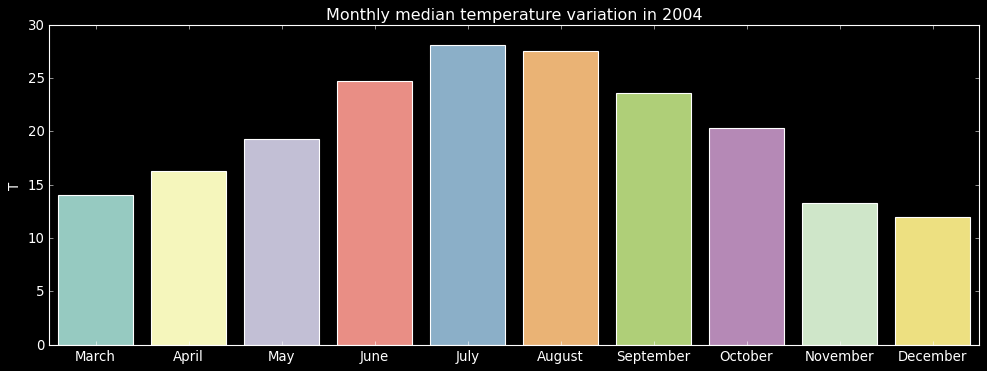

In [84]:
# Create a bar plot to visualize monthly median temperature variation in 2004 

plt.figure(figsize=(15, 5))
plt.title('Monthly median temperature variation in 2004')
sns.barplot(x=months_2004, y='T', data= group_2004_month.median())
plt.show()

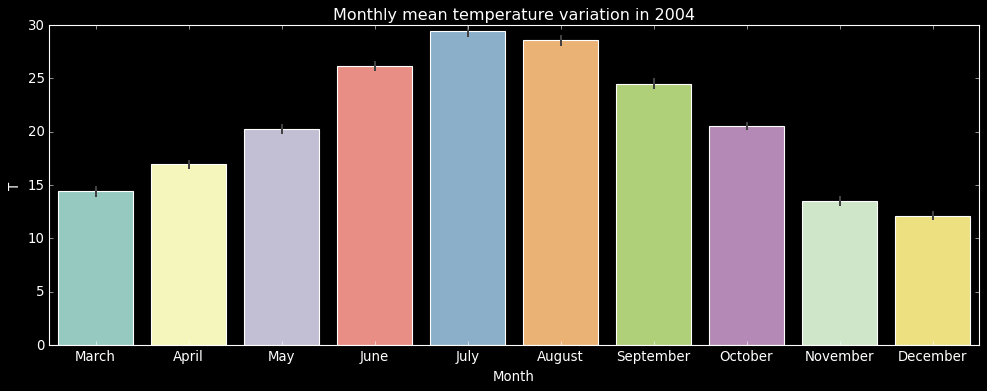

In [85]:
# Without applying the grouping & aggregation operations, create a bar plot to visualise monthly mean temperature variation in 2004.

plt.figure(figsize=(15, 5))
plt.title('Monthly mean temperature variation in 2004')
sns.barplot(x='Month', y='T', data=df[df['Year'] == 2004]) 
plt.xticks(ticks=np.arange(10), labels=months_2004)
plt.show()

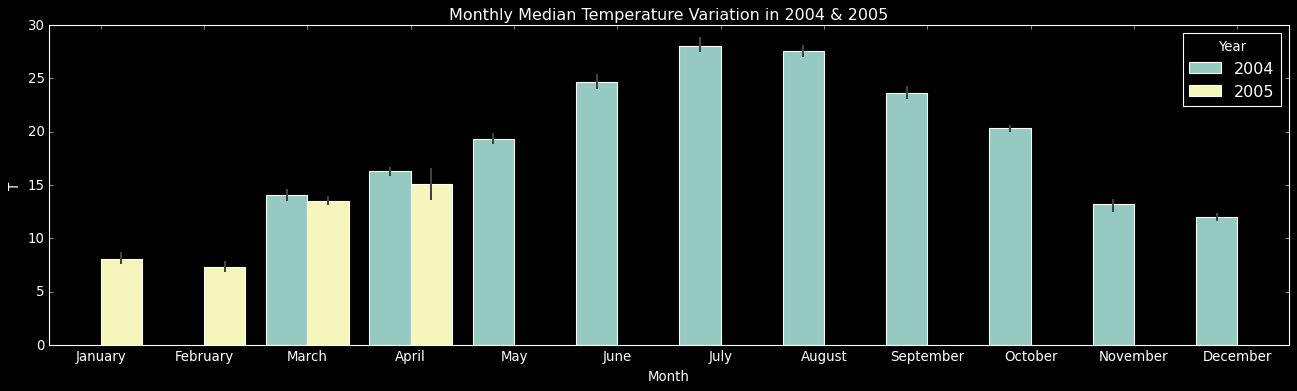

In [86]:
# Create a bar plot using sns to compare the monthly median temperature variation in 2004 and 2005
# such that the bars for a month for two different years are adjacent to each other.

from numpy import median
plt.figure(figsize=(20, 5))
plt.title('Monthly Median Temperature Variation in 2004 & 2005')
sns.barplot(x='Month', y='T', hue='Year', data=df, estimator=median)
plt.xticks(ticks=np.arange(12), labels=list(months_2005) + list(months_2004[2:]))
plt.show()

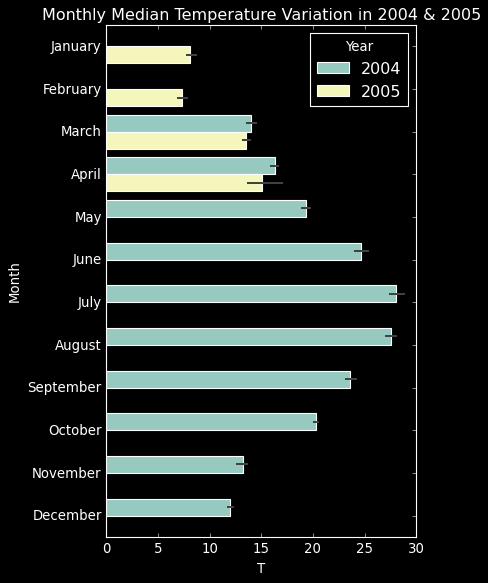

In [87]:
# Create a bar plot using sns to compare the monthly median temperature variation in 2004 and 2005
# such that the bars for a month for two different years are adjacent to each other.
# horizontal bar plot

plt.figure(figsize=(5, 8))
plt.title('Monthly Median Temperature Variation in 2004 & 2005')
sns.barplot(x='T', y='Month', hue='Year', data=df, estimator=median, orient='h')
plt.yticks(ticks=np.arange(12), labels=list(months_2005) + list(months_2004[2:]))
plt.show()

In [88]:
# Convert the 'Month' values in the 'df' Datarame into categorical values.

print("Before conversion, the data-type is", df['Month'].dtype)
df['Month'] = df['Month'].astype('category')
print("\nAfter conversion, the data-type is", df['Month'].dtype)

Before conversion, the data-type is int64

After conversion, the data-type is category


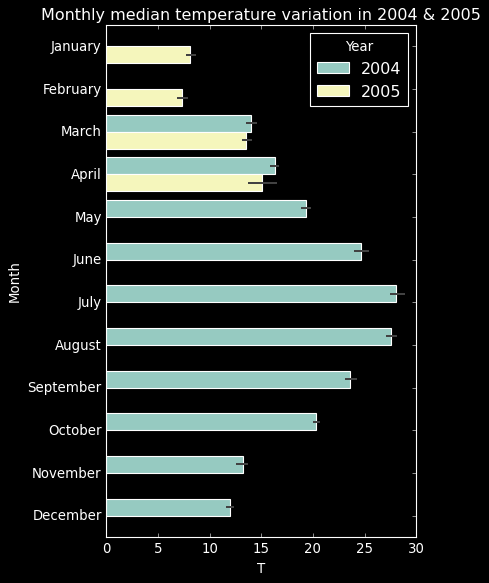

In [89]:
# Create the above bar plot without using the 'orient' parameter.

plt.figure(figsize=(5, 8))
plt.title('Monthly median temperature variation in 2004 & 2005')
sns.barplot(x='T',y='Month', hue='Year', data=df, estimator=median)
plt.yticks(ticks=np.arange(12), labels=list(months_2005) + list(months_2004[2:]))
plt.show()

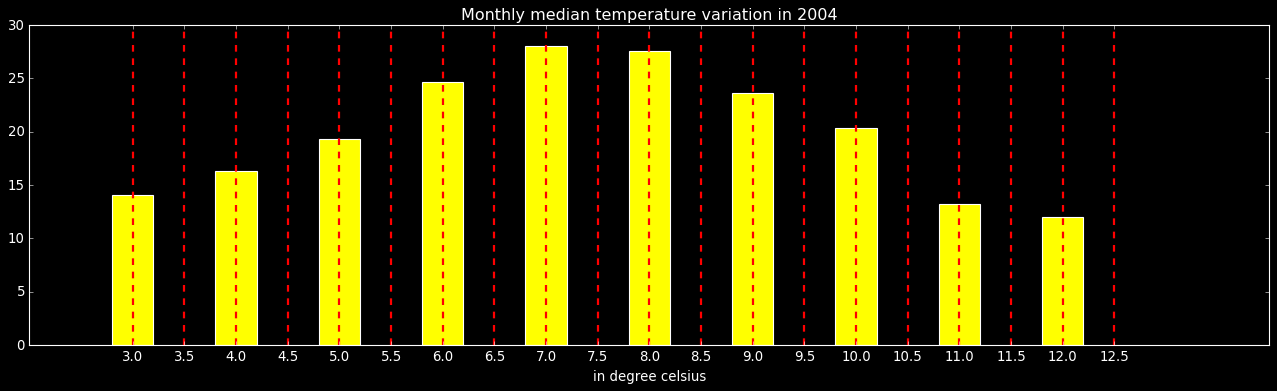

In [90]:
# Shift the bars leftwards in the bar plot.

bar_width = 0.4
plt.figure(figsize=(20,5))
plt.title('Monthly median temperature variation in 2004')
plt.bar(x=np.arange(3, 13) - bar_width/2, height=group_2004_month.median()['T'], width=bar_width, align='edge', color='yellow')
plt.xticks(ticks=np.arange(3, 13, 0.5))
plt.xlabel('in degree celsius')
plt.grid(which='major', axis='x', color='r', linestyle='--', linewidth=2)
plt.show()

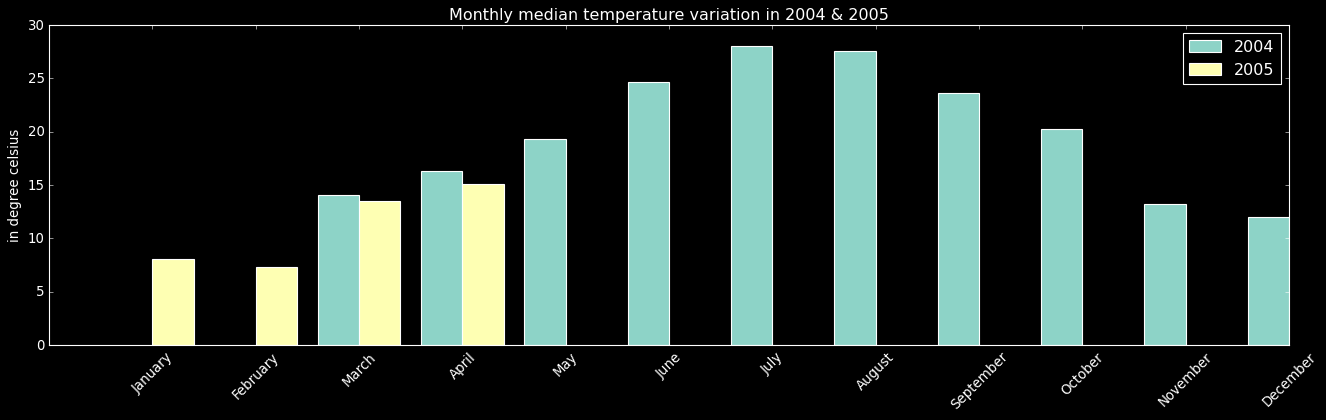

In [91]:
# Create a bar plot for the monthly median temperature for both the years by using the combination of 'edge' & 'center' alignments.

bar_width = 0.4
plt.figure(figsize=(20,5))
plt.title('Monthly median temperature variation in 2004 & 2005')
plt.bar(x=np.arange(3, 13) - bar_width, height=group_2004_month.median()['T'], width=bar_width, align='edge', label='2004')
plt.bar(x=np.arange(1, 5) + bar_width/2, height=group_2005_month.median()['T'], width=bar_width, align='center', label='2005')
plt.xticks(ticks=np.arange(1, 13), labels=list(months_2005) + list(months_2004[2:]), rotation=45)
plt.ylabel('in degree celsius')
plt.legend()
plt.show()

In [92]:
def line_plot(width, height, x_series, y_series, colour, label):
    plt.figure(figsize=(width, height))
    plt.plot(x_series, y_series, colour, label=label)
    plt.legend()
    plt.show()

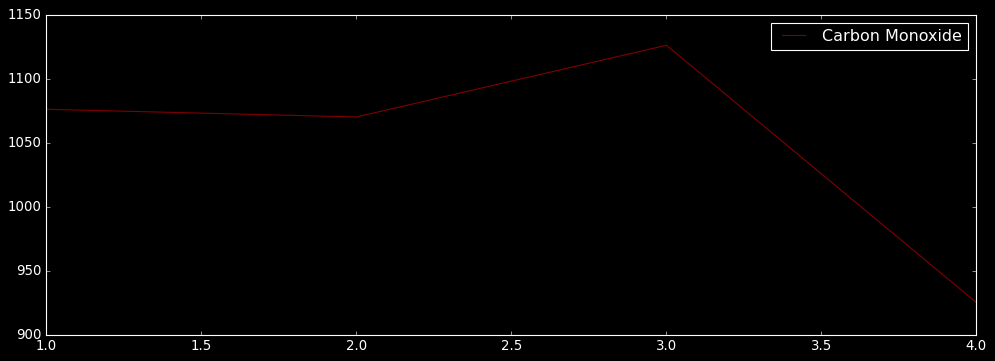

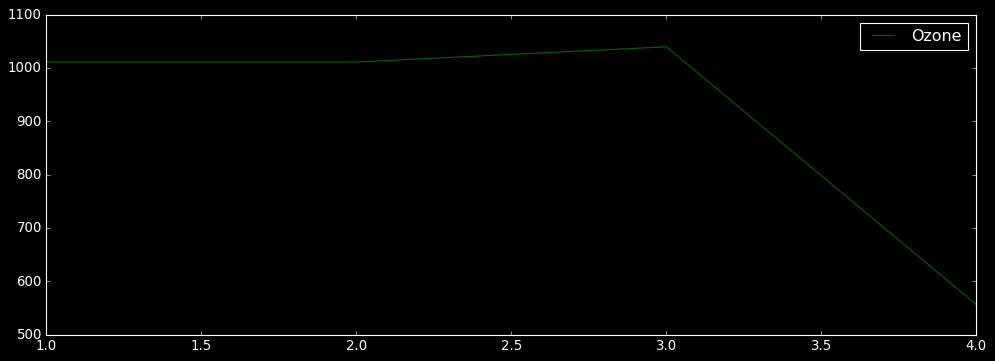

In [93]:
# Create a line plot to visualise the monthly median concentration of carbon monoxide and ozone in the year 2005.

line_plot(15,5,np.arange(1, 5),group_2005_month.median()['PT08.S1(CO)'],'maroon','Carbon Monoxide')
line_plot(15,5,np.arange(1, 5),group_2005_month.median()['PT08.S5(O3)'],'darkgreen','Ozone')

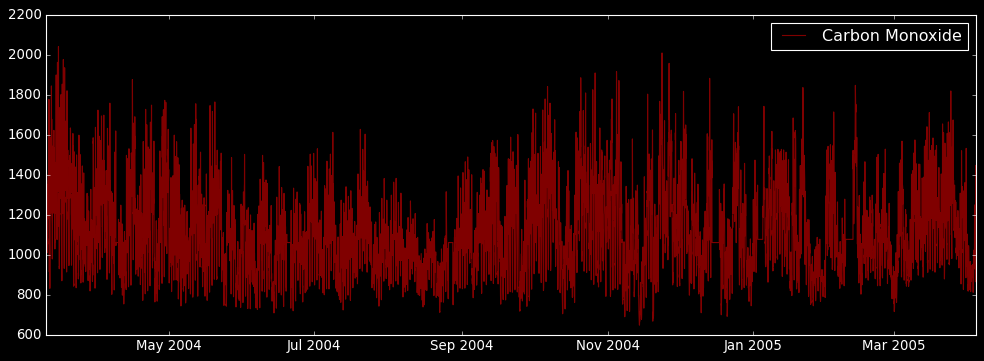

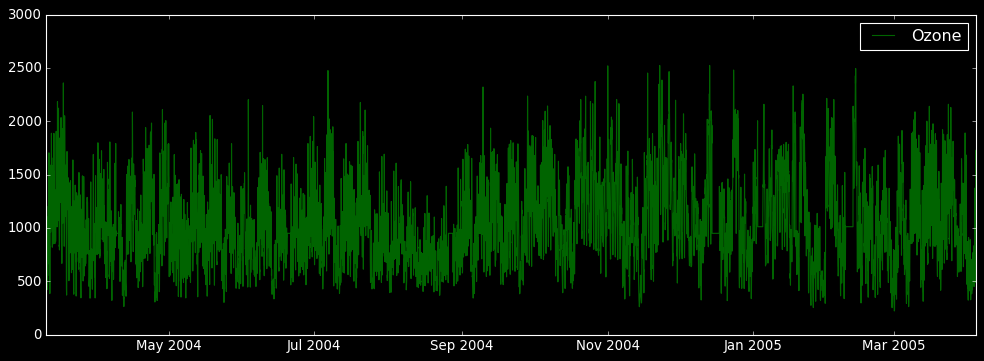

In [94]:
# Create time series plots for the carbon monoxide and ozone columns.

line_plot(15,5,df['DateTime'],df['PT08.S1(CO)'],'maroon','Carbon Monoxide')
line_plot(15,5,df['DateTime'],df['PT08.S5(O3)'],'darkgreen','Ozone')

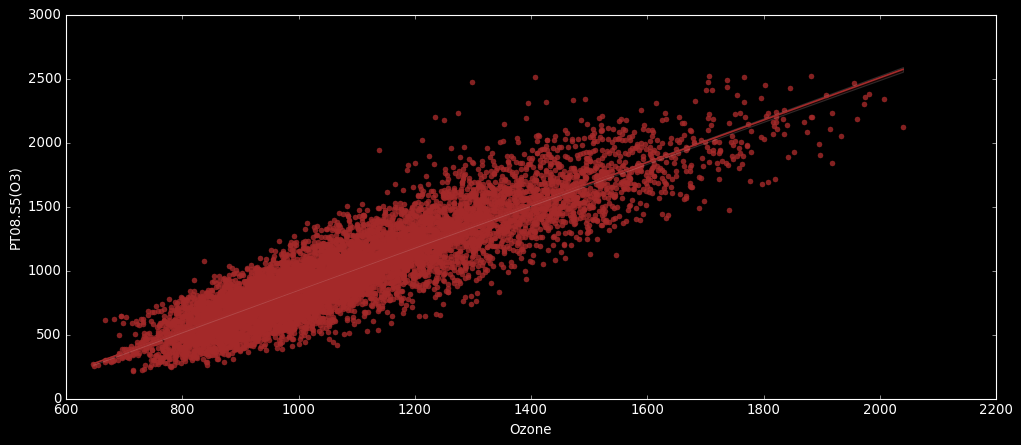

In [95]:
# Create a regression plot for the carbon monoxide and ozone columns.

plt.figure(figsize=(15, 6))
sns.regplot(x='PT08.S1(CO)', y='PT08.S5(O3)', data=df, color = 'brown')
plt.xlabel('Carbon Monoxide')
plt.xlabel('Ozone')
plt.show()

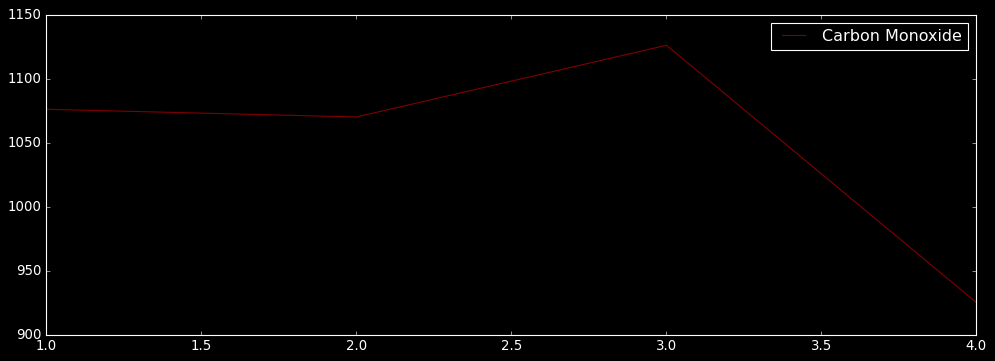

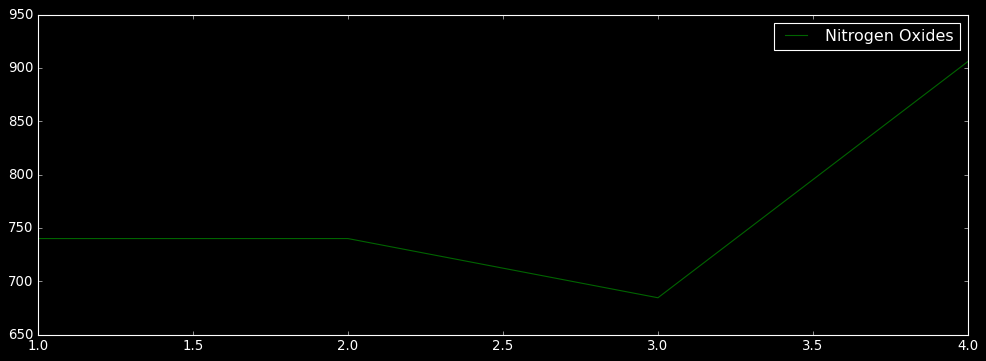

In [96]:
# Create a line plot to visualise the monthly median concentration of carbon monoxide and nitrogen oxides in the year 2005.

line_plot(15,5,np.arange(1, 5),group_2005_month.median()['PT08.S1(CO)'],'maroon','Carbon Monoxide')
line_plot(15,5,np.arange(1, 5),group_2005_month.median()['PT08.S3(NOx)'],'darkgreen','Nitrogen Oxides')

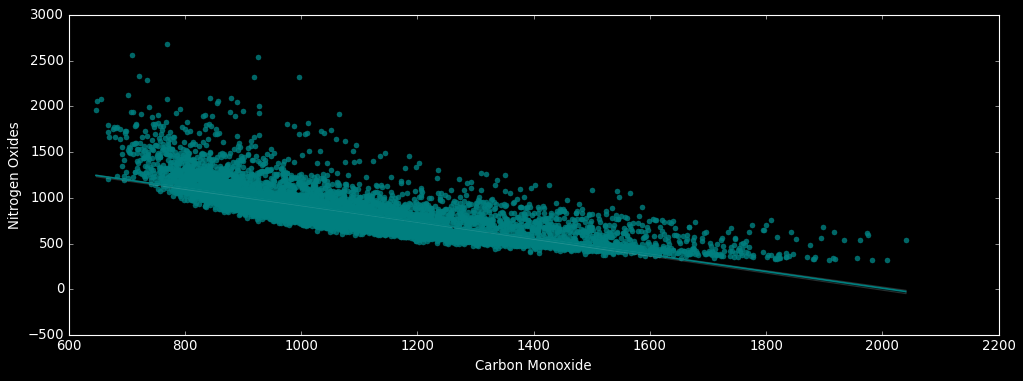

In [97]:
# Create a regression plot for the carbon monoxide and nitrogen oxide columns.

plt.figure(figsize=(15, 5))
sns.regplot(x='PT08.S1(CO)', y='PT08.S3(NOx)', data=df, color='teal')
plt.xlabel('Carbon Monoxide')
plt.ylabel('Nitrogen Oxides')
plt.show()

In [98]:
# Calculate the correlation coefficient for the carbon monoxide and ozone columns.

np.corrcoef(df['PT08.S1(CO)'], df['PT08.S5(O3)'])

array([[1.        , 0.89936876],
       [0.89936876, 1.        ]])

**The correlation between carbon monoxide and ozone is 0.90**

In [99]:
# Calculate the correlation coefficient for the carbon monoxide and nitrogen oxide columns.

np.corrcoef(df['PT08.S1(CO)'], df['PT08.S3(NOx)'])

array([[ 1.        , -0.76992041],
       [-0.76992041,  1.        ]])

**The correlation between carbon monoxide and nitrogen oxide is -0.77**

In [100]:
# Calculate the R value between all the air pollutants, temperature, relative & absolute humidity columns in the 'df' DataFrame

corr_df = df.iloc[:, 1:-4].corr()
corr_df

PT08.S1(CO)  C6H6(GT)  PT08.S2(NMHC)  PT08.S3(NOx)  \
PT08.S1(CO)       1.000000  0.882921       0.892097     -0.769920   
C6H6(GT)          0.882921  1.000000       0.981707     -0.730267   
PT08.S2(NMHC)     0.892097  0.981707       1.000000     -0.792370   
PT08.S3(NOx)     -0.769920 -0.730267      -0.792370      1.000000   
PT08.S4(NO2)      0.677392  0.764243       0.775995     -0.528111   
PT08.S5(O3)       0.899369  0.864326       0.879285     -0.795013   
T                 0.048765  0.203647       0.245397     -0.138125   
RH                0.114426 -0.062666      -0.091310     -0.057582   
AH                0.134961  0.172959       0.191374     -0.224756   

               PT08.S4(NO2)  PT08.S5(O3)         T        RH        AH  
PT08.S1(CO)        0.677392     0.899369  0.048765  0.114426  0.134961  
C6H6(GT)           0.764243     0.864326  0.203647 -0.062666  0.172959  
PT08.S2(NMHC)      0.775995     0.879285  0.245397 -0.091310  0.191374  
PT08.S3(NOx)      -0.528111    -0.795013 -0.138125 -0.057582 -0.224756  
PT08.S4(NO2)       1.000000     0.585281  0.568770 -0.034751  0.635471  
PT08.S5(O3)        0.585281     1.000000 -0.027593  0.124988  0.069730  
T                  0.568770    -0.027593  1.000000 -0.576271  0.661982  
RH                -0.034751     0.124988 -0.576271  1.000000  0.163933  
AH                 0.635471     0.069730  0.661982  0.163933  1.000000

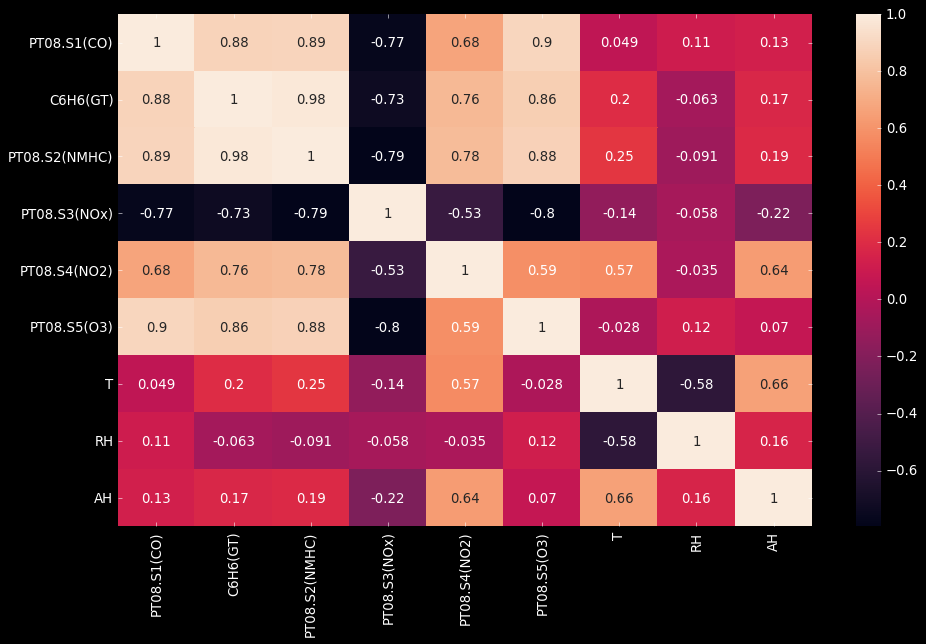

In [101]:
# Create a heatmap to pinpoint the columns in the 'df' DataFrame exhibiting high correlation.

plt.figure(figsize=(14, 8))
sns.heatmap(data=corr_df, annot=True) # 'annot=True' fills the R values in the heatmap cells
plt.show()

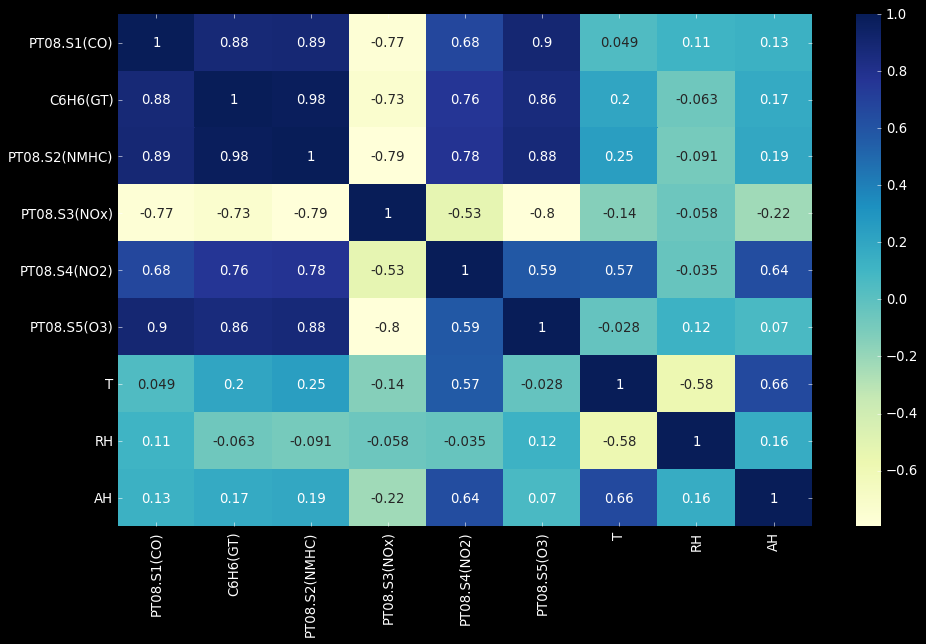

In [102]:
# Change the color scheme of the above heatmap to 'yellow-green-blue' by using 'YlGnBu'.

plt.figure(figsize=(14, 8))
sns.heatmap(data=corr_df, annot=True, cmap='YlGnBu')
plt.show()

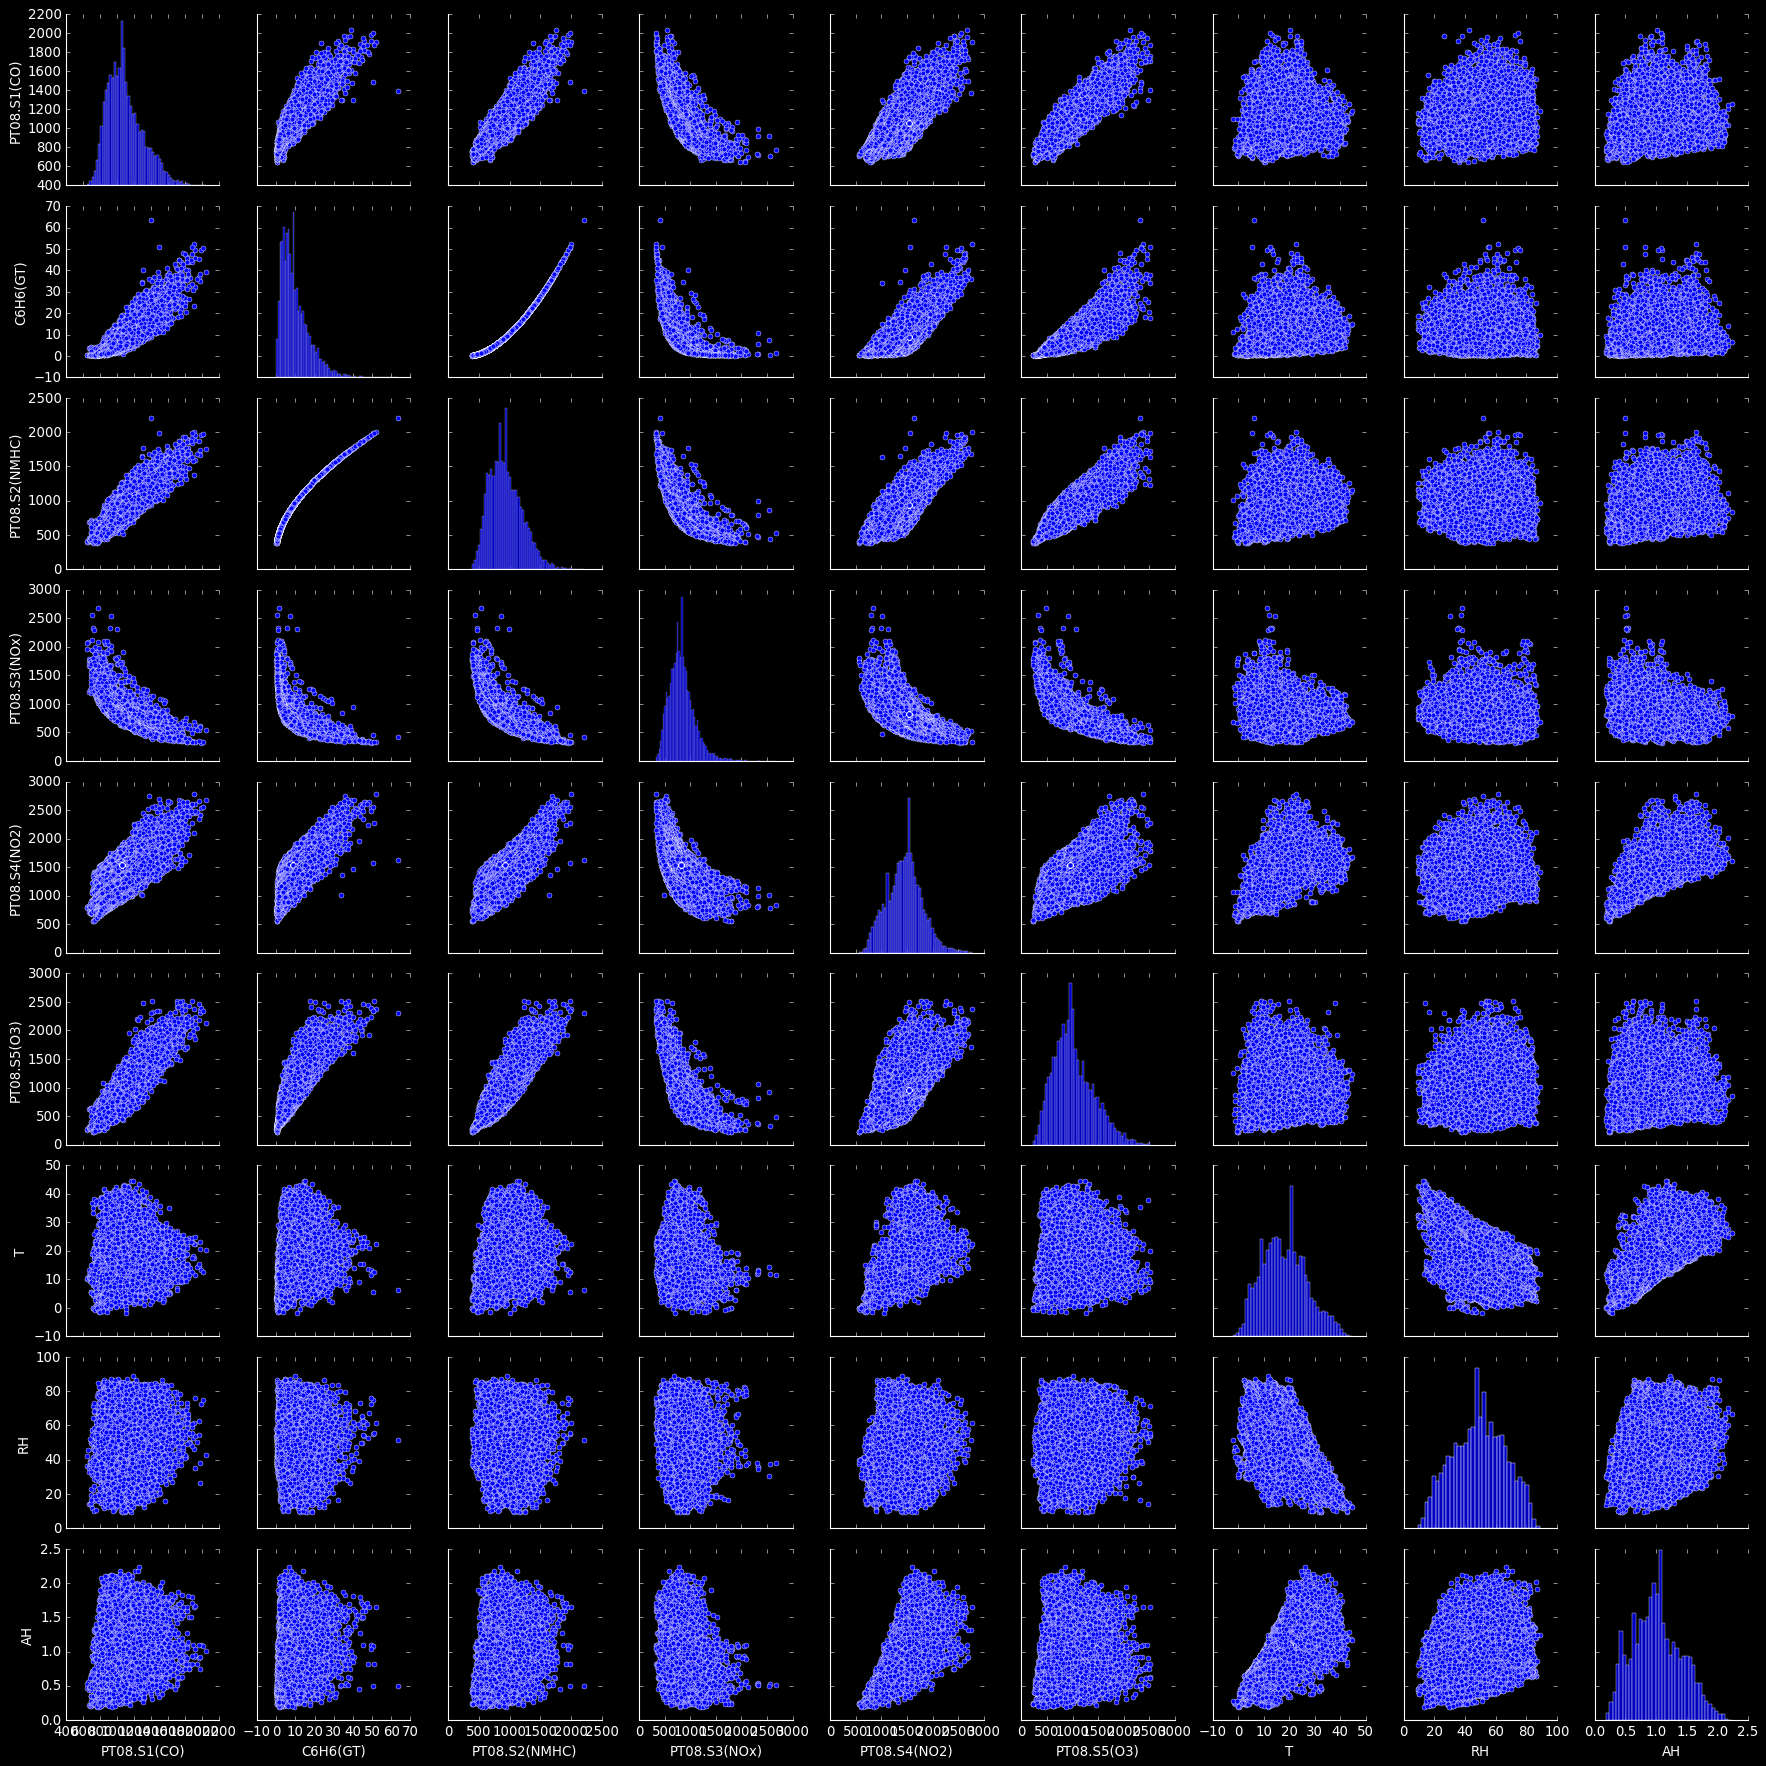

In [103]:
# Create the scatter plots for the numeric columns of the 'df' DataFrame in one go.

sns.pairplot(df.iloc[:, 1:-4])
plt.show()

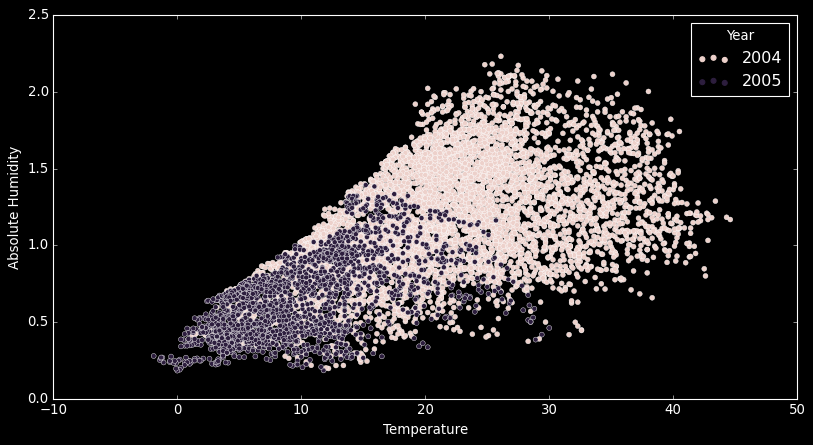

In [104]:
# Differentiate between the points for the year 2004 and 2005 values in the above scatter plot.

plt.figure(figsize=(12, 6))
sns.scatterplot(x='T', y='AH', hue='Year', data=df)
plt.xlabel('Temperature')
plt.ylabel('Absolute Humidity')
plt.show()

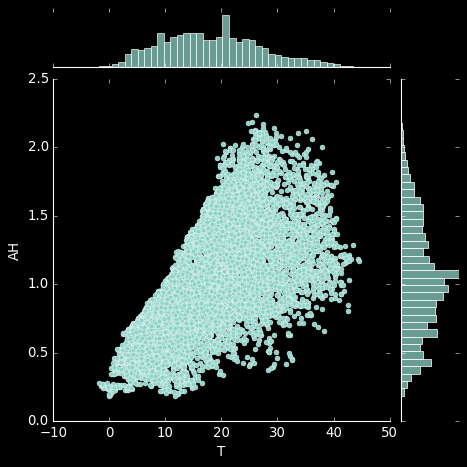

In [105]:
# Create a scatter plot between the the temperature and absolute humidity using the jointplot() function

sns.jointplot(x='T', y='AH', data=df, kind='scatter')
plt.xlabel('Temperature')
plt.ylabel('Absolute Humidity')
plt.show()

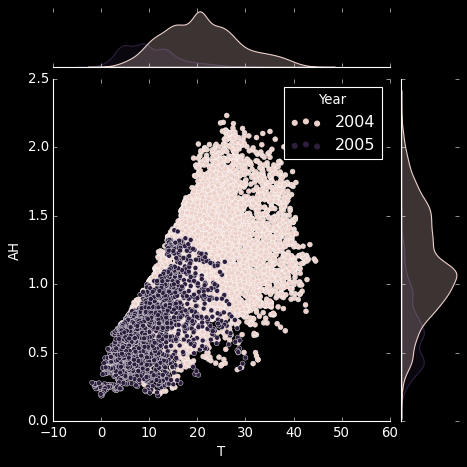

In [106]:
# Create a scatter plot between the the temperature and absolute humidity using the jointplot() function

sns.jointplot(x='T', y='AH', hue='Year', data=df, kind='scatter')
plt.xlabel('Temperature')
plt.ylabel('Absolute Humidity')
plt.show()

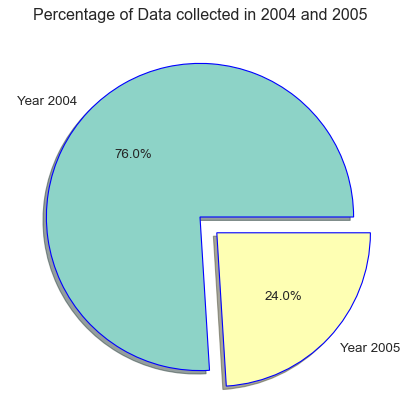

In [107]:
# Add 3D effect to the pie.
year_slices = df['Year'].value_counts() * 100 / df.shape[0]
year_labels = ['Year 2004', 'Year 2005']
explode = [0, 0.15]

plt.style.use('seaborn-dark')
plt.figure(dpi=80)
plt.title("Percentage of Data collected in 2004 and 2005")
plt.pie(year_slices, labels=year_labels, explode=explode, autopct='%1.1f%%', shadow=True, wedgeprops={'edgecolor':'Blue'})
plt.show()

In [108]:
# Get the month names from the 'DateTime'
df['DateTime'].dt.month_name()


df['Month Name'] = df['DateTime'].dt.month_name()
df.head()

DateTime  PT08.S1(CO)  C6H6(GT)  PT08.S2(NMHC)  PT08.S3(NOx)  \
0 2004-03-10 18:00:00       1360.0      11.9         1046.0        1056.0   
1 2004-03-10 19:00:00       1292.0       9.4          955.0        1174.0   
2 2004-03-10 20:00:00       1402.0       9.0          939.0        1140.0   
3 2004-03-10 21:00:00       1376.0       9.2          948.0        1092.0   
4 2004-03-10 22:00:00       1272.0       6.5          836.0        1205.0   

   PT08.S4(NO2)  PT08.S5(O3)     T    RH      AH  Day Month  Year   Day Name  \
0        1692.0       1268.0  13.6  48.9  0.7578   10     3  2004  Wednesday   
1        1559.0        972.0  13.3  47.7  0.7255   10     3  2004  Wednesday   
2        1555.0       1074.0  11.9  54.0  0.7502   10     3  2004  Wednesday   
3        1584.0       1203.0  11.0  60.0  0.7867   10     3  2004  Wednesday   
4        1490.0       1110.0  11.2  59.6  0.7888   10     3  2004  Wednesday   

  Month Name  
0      March  
1      March  
2      March  
3      March  
4      March

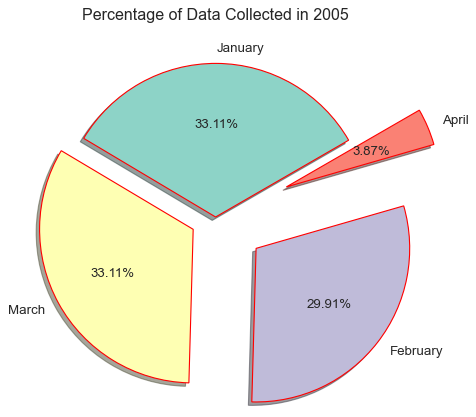

In [109]:
# Create a pie chart for the 2005 displaying all the months. Label the slices. 

data = df.loc[df['Year'] == 2005, 'Month Name'].value_counts()
explode = np.linspace(0, 0.5, 4) # Shift the slices away from the centre of the pie

plt.figure(dpi=80)
plt.title('Percentage of Data Collected in 2005')
plt.pie(data, labels= data.index, 
       explode=explode, autopct='%1.2f%%',
       startangle=30, # The first slice will be placed at an angle of 30 degrees w.r.t. to the horizontal axis in the anti-clockwise direction.
       shadow = True,
       wedgeprops={'edgecolor':'r'})
plt.show()

Required one-sigma interval ==> (32.28233286470518, 66.2402064107034) 



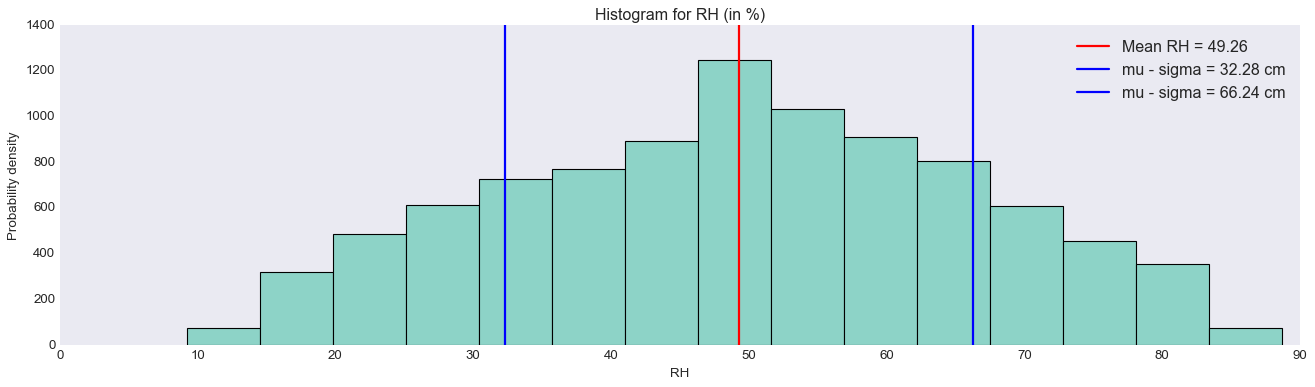

In [110]:
# Compute the one-sigma interval for the relative humidity values.
print("Required one-sigma interval ==>", (df['RH'].mean() - df['RH'].std(), df['RH'].mean() + df['RH'].std()), "\n")

# Create a histogram for the relayive humidity values and finf out whether it follows a bell curve or not.
plt.figure(figsize=(20, 5))
plt.title("Histogram for RH (in %)")
plt.hist(df['RH'], bins='sturges', edgecolor='black')
plt.axvline(df['RH'].mean(), color='red', label=f"Mean RH = {df['RH'].mean():.2f}", linewidth=2)

# One-sigma
plt.axvline(df['RH'].mean() - df['RH'].std(), color='b',
            label= f"mu - sigma = {df['RH'].mean() - df['RH'].std():.2f} cm", linewidth=2)
plt.axvline(df['RH'].mean() + df['RH'].std(), color='b',
            label= f"mu - sigma = {df['RH'].mean() + df['RH'].std():.2f} cm", linewidth=2)

plt.xlabel('RH')
plt.ylabel("Probability density")
plt.legend()
plt.show()

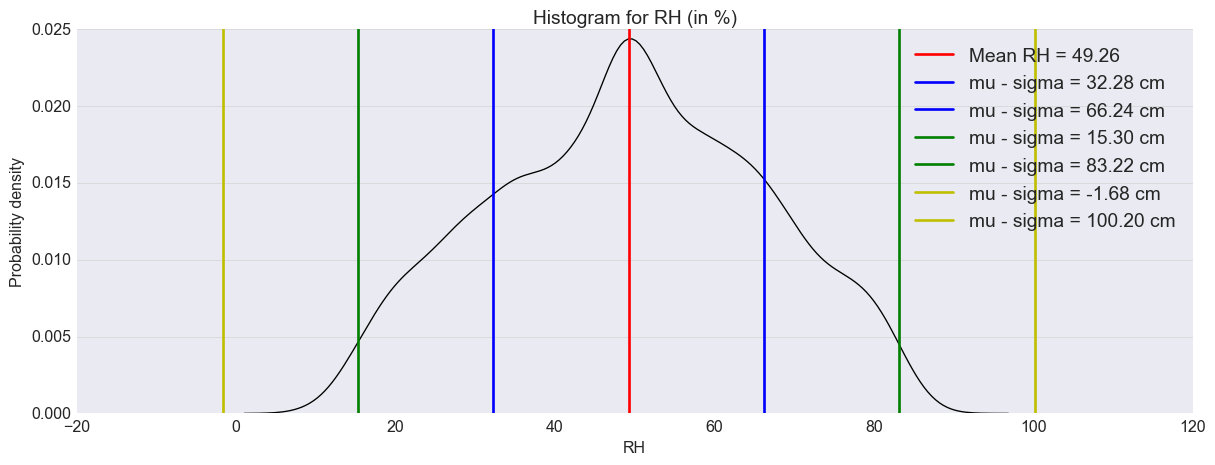

In [111]:
# Create a bell curve with the vertical lines denoting the mean value and the one-sigma interval.

plt.figure(figsize=(15, 5), dpi=96)
plt.title('Histogram for RH (in %)')
# plt.hist(df['RH'], bins='sturges', edgecolor='black')
sns.distplot(df['RH'], hist=False, bins='sturges', color='k')
plt.axvline(df['RH'].mean(), color='red', label=f"Mean RH = {df['RH'].mean():.2f}", linewidth=2)

# One-two-three-sigma
plt.axvline(df['RH'].mean() - df['RH'].std(), color='b',
            label= f"mu - sigma = {df['RH'].mean() - df['RH'].std():.2f} cm", linewidth=2)
plt.axvline(df['RH'].mean() + df['RH'].std(), color='b',
            label= f"mu - sigma = {df['RH'].mean() + df['RH'].std():.2f} cm", linewidth=2)

plt.axvline(df['RH'].mean() - 2*df['RH'].std(), color='g',
            label= f"mu - sigma = {df['RH'].mean() - 2*df['RH'].std():.2f} cm", linewidth=2)
plt.axvline(df['RH'].mean() + 2*df['RH'].std(), color='g',
            label= f"mu - sigma = {df['RH'].mean() + 2*df['RH'].std():.2f} cm", linewidth=2)

plt.axvline(df['RH'].mean() - 3*df['RH'].std(), color='y',
            label= f"mu - sigma = {df['RH'].mean() - 3*df['RH'].std():.2f} cm", linewidth=2)
plt.axvline(df['RH'].mean() + 3*df['RH'].std(), color='y',
            label= f"mu - sigma = {df['RH'].mean() + 3*df['RH'].std():.2f} cm", linewidth=2)

plt.xlabel('RH')
plt.ylabel("Probability density")
plt.grid(which='major', axis='y', color='lightgrey')
plt.legend()
plt.show()

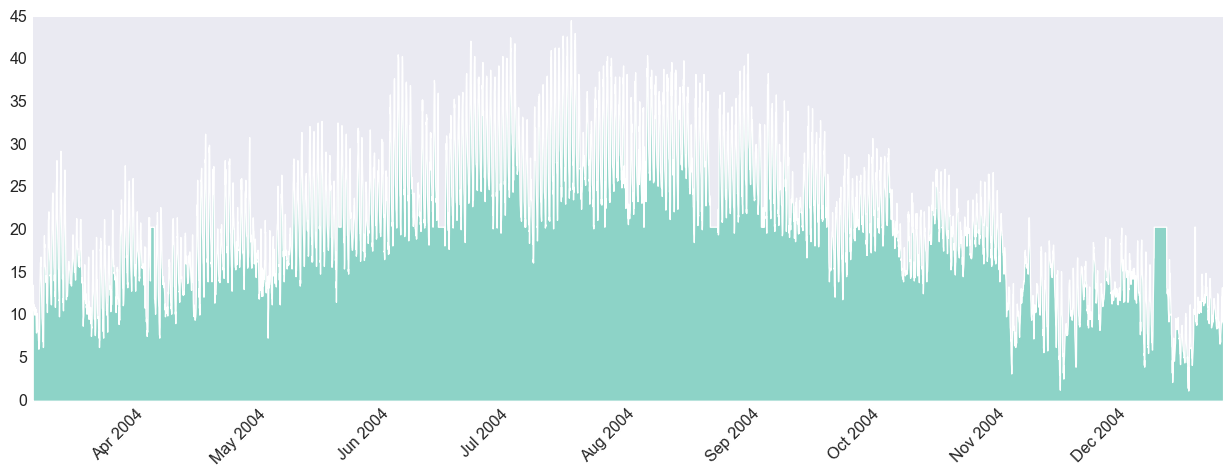

In [112]:
# S1.1 Create a stack plot for the daily variation in temperature in the year 2004.
plt.figure(figsize=(16, 5), dpi=96)
plt.stackplot(aq_2004_df['DateTime'], aq_2004_df['T'])
plt.xticks(rotation=45)
plt.show()